In [2]:
# %pip install seaborn

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\austinsh\AppData\Local\Temp\ipykernel_20288\555797462.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [4]:
# Set max columns to display
pd.set_option('display.max_columns', None)

In [5]:
#df_outlierHandling = pd.read_csv('/workspaces/codespaces-jupyter/Final Machine/Interpolated LIMS/df_outlierHandling.csv')

df_outlierHandling = pd.read_csv(r'C:\Users\austinsh\Project-OptiC4\IV Optimize\Testing Data\Continuous Data 2023\adjusted_Limits.csv')

# Print descriptive statistics for df_outlierHandling
df_outlierHandling.describe()

425_pct_Al      M_Value        Al2O3   C4_pct_Eth   C4_pct_H2O  \
count  5907.000000  5907.000000  5907.000000  5907.000000  5907.000000   
mean      6.177463     3.635491    11.524423     1.796808    18.078726   
std       0.387959     0.099475     0.426150     0.417434     1.559847   
min       3.824980     3.315450    10.762400     0.158000    13.980000   
25%       6.108820     3.566460    11.084700     1.455195    17.036500   
50%       6.257890     3.628420    11.547300     1.751230    17.839500   
75%       6.374060     3.709675    11.930800     2.010585    18.763000   
max       6.865290     3.901390    12.201500     3.319520    25.218800   

       HydWtr_pct_Ammonia   C4_pct_Hex  HydWtr_Na2O      Butanol      Decanol  \
count         5907.000000  5907.000000  5907.000000  5907.000000  5907.000000   
mean             0.960699     0.379789     2.649824    15.391984     2.810334   
std              0.138713     0.112972     7.271949    19.807023     1.654333   
min              0.064418     0.008000     0.000000     0.900000     0.000000   
25%              0.873468     0.304122     0.924784     2.244165     1.564165   
50%              0.939714     0.380946     1.668030     4.473330     2.210000   
75%              1.033905     0.454564     1.884735    22.424150     3.784585   
max              1.682630     0.673000    71.538400    98.791300     9.899700   

           Ethanol      Hexanol      Octanol      DI55102      DI55152  \
count  5907.000000  5907.000000  5907.000000  5907.000000  5907.000000   
mean     20.973236     1.531320     2.184515     0.827206     1.024130   
std      22.255359     0.796182     1.194351     0.057435     0.025299   
min       0.610000     0.000000     0.360000     0.750013     0.954142   
25%       4.124165     0.946667     1.285000     0.794854     1.001850   
50%      11.398300     1.210000     1.678330     0.794861     1.027900   
75%      30.152500     2.080000     3.089165     0.864144     1.046915   
max     123.142000     5.354100     6.706600     1.002320     1.071690   

           DI55580       FC55003      FC55009       FC55552      FC55569  \
count  5907.000000   5907.000000  5907.000000   5907.000000  5907.000000   
mean      0.972526   5954.957818  1104.273728  34674.993398  6533.752057   
std       0.036075    873.102412   381.486930   3791.549927   368.192805   
min       0.873708    197.994000    20.886600  15597.900000  5316.150000   
25%       0.949922   5440.550000   855.153500  33029.950000  6315.465000   
50%       0.986212   5906.070000  1062.500000  36376.600000  6469.000000   
75%       0.999221   6440.965000  1313.400000  37817.900000  6734.055000   
max       1.031160  10974.800000  2671.660000  43342.900000  9321.450000   

           FC55576     FFC55553     FFC55555      LC55557      LC90366  \
count  5907.000000  5907.000000  5907.000000  5907.000000  5907.000000   
mean    373.663421     0.920749     0.786987    71.161456    58.538364   
std     193.422195     0.048114     0.014399     6.623216    10.402256   
min       0.138046     0.371550     0.698476    42.203300    20.034500   
25%     227.379500     0.889886     0.779140    63.075950    50.560650   
50%     379.898000     0.924255     0.781144    74.921500    60.689300   
75%     499.426000     0.952738     0.799656    76.876550    66.785900   
max    1199.860000     1.095610     0.988286    92.151200    78.844100   

           LC90368      PI55020      TC55552      TI55021  
count  5907.000000  5907.000000  5907.000000  5907.000000  
mean     57.391443    -0.467304   165.672499   225.631868  
std      11.044119     0.667670    11.933592     3.424033  
min      21.459200    -4.121980   108.104000   215.852000  
25%      49.033850    -0.827484   160.038500   222.794500  
50%      60.318500    -0.309410   165.163000   225.879000  
75%      65.951800     0.009196   175.297000   228.088000  
max      77.386600     1.895150   207.426000   243.808000

In [6]:
num_columns = df_outlierHandling.shape[1]
print("Number of features:", num_columns)

Number of features: 30


In [7]:
# # Assuming df_outlierHandling is your DataFrame
# non_date_columns = df_outlierHandling.columns[df_outlierHandling.columns != 'Date']

# # Drop rows where any value (excluding 'Date') is 0 or less
# df_outlierHandling = df_outlierHandling.drop(df_outlierHandling[(df_outlierHandling[non_date_columns] <= 100).any(axis=1)].index)

# df_outlierHandling



In [8]:
df_outlierHandling['Date'] = pd.to_datetime(df_outlierHandling['Date'])
print(df_outlierHandling.dtypes)

# Output after conversion:
# date_datetime64    datetime64[ns]
# date_object        datetime64[ns]
# dtype: object


Date                  datetime64[ns]
425_pct_Al                   float64
M_Value                      float64
Al2O3                        float64
C4_pct_Eth                   float64
C4_pct_H2O                   float64
HydWtr_pct_Ammonia           float64
C4_pct_Hex                   float64
HydWtr_Na2O                  float64
Butanol                      float64
Decanol                      float64
Ethanol                      float64
Hexanol                      float64
Octanol                      float64
DI55102                      float64
DI55152                      float64
DI55580                      float64
FC55003                      float64
FC55009                      float64
FC55552                      float64
FC55569                      float64
FC55576                      float64
FFC55553                     float64
FFC55555                     float64
LC55557                      float64
LC90366                      float64
LC90368                      float64
P

Skipping datetime column: Date


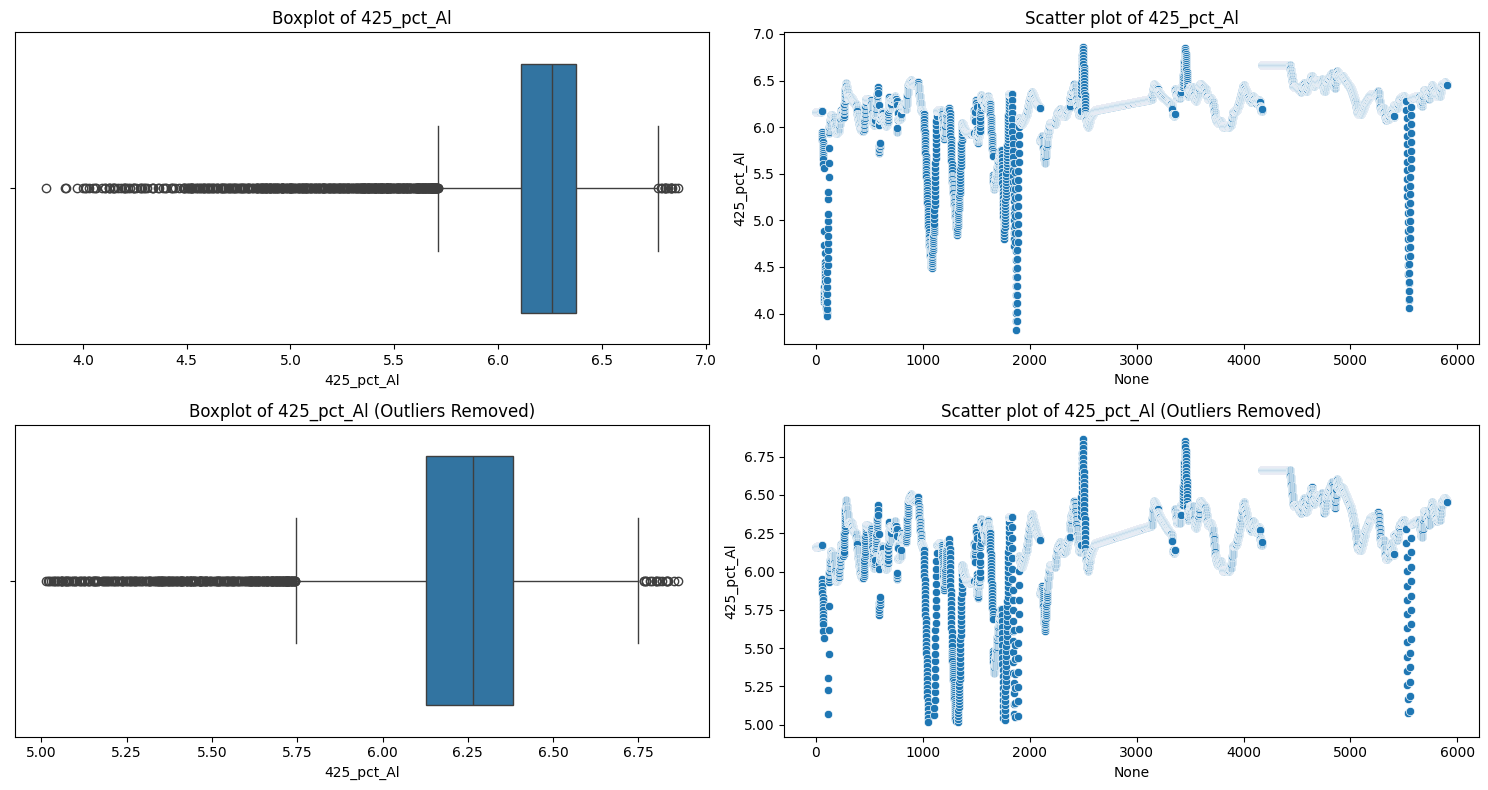

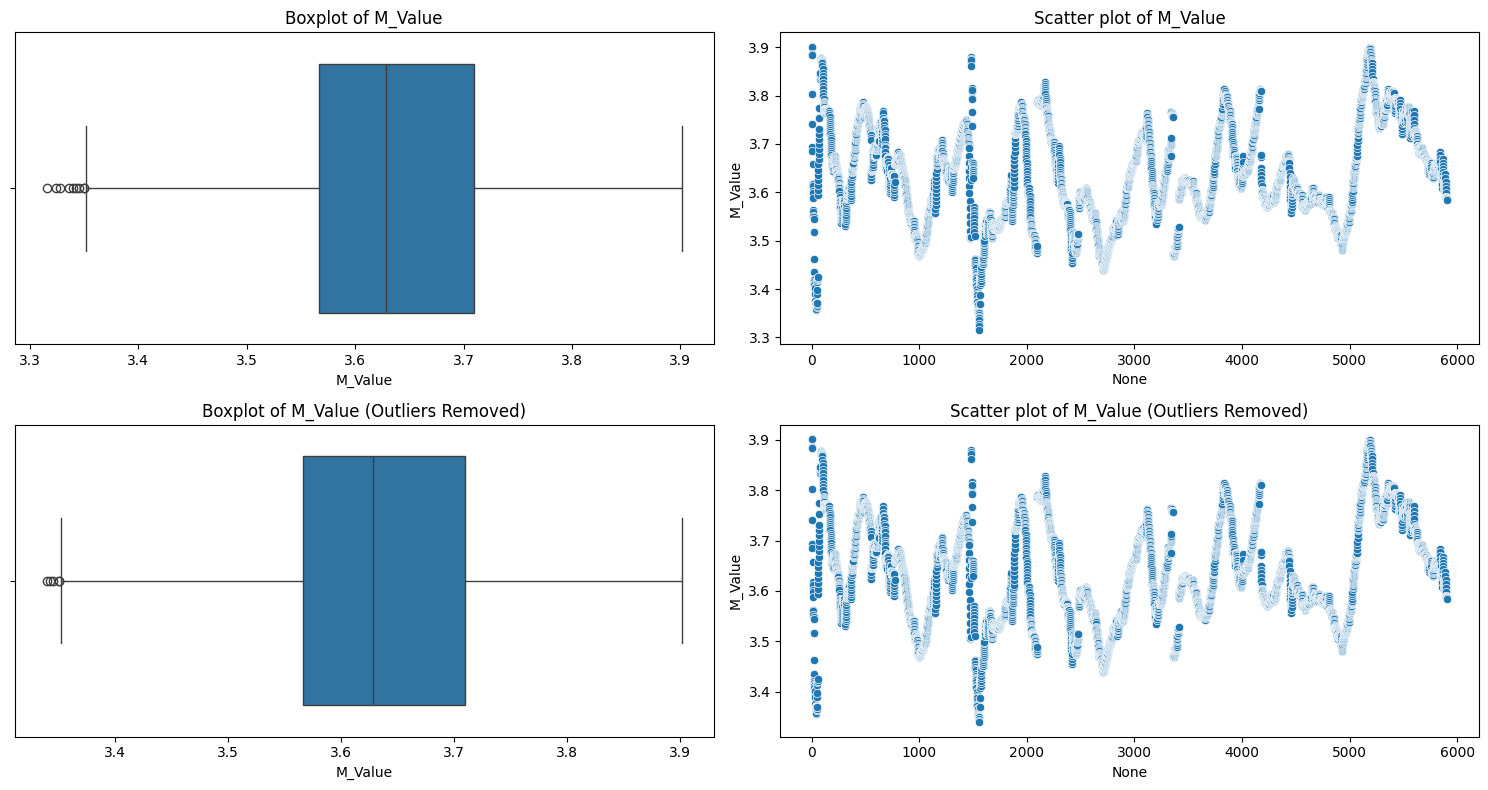

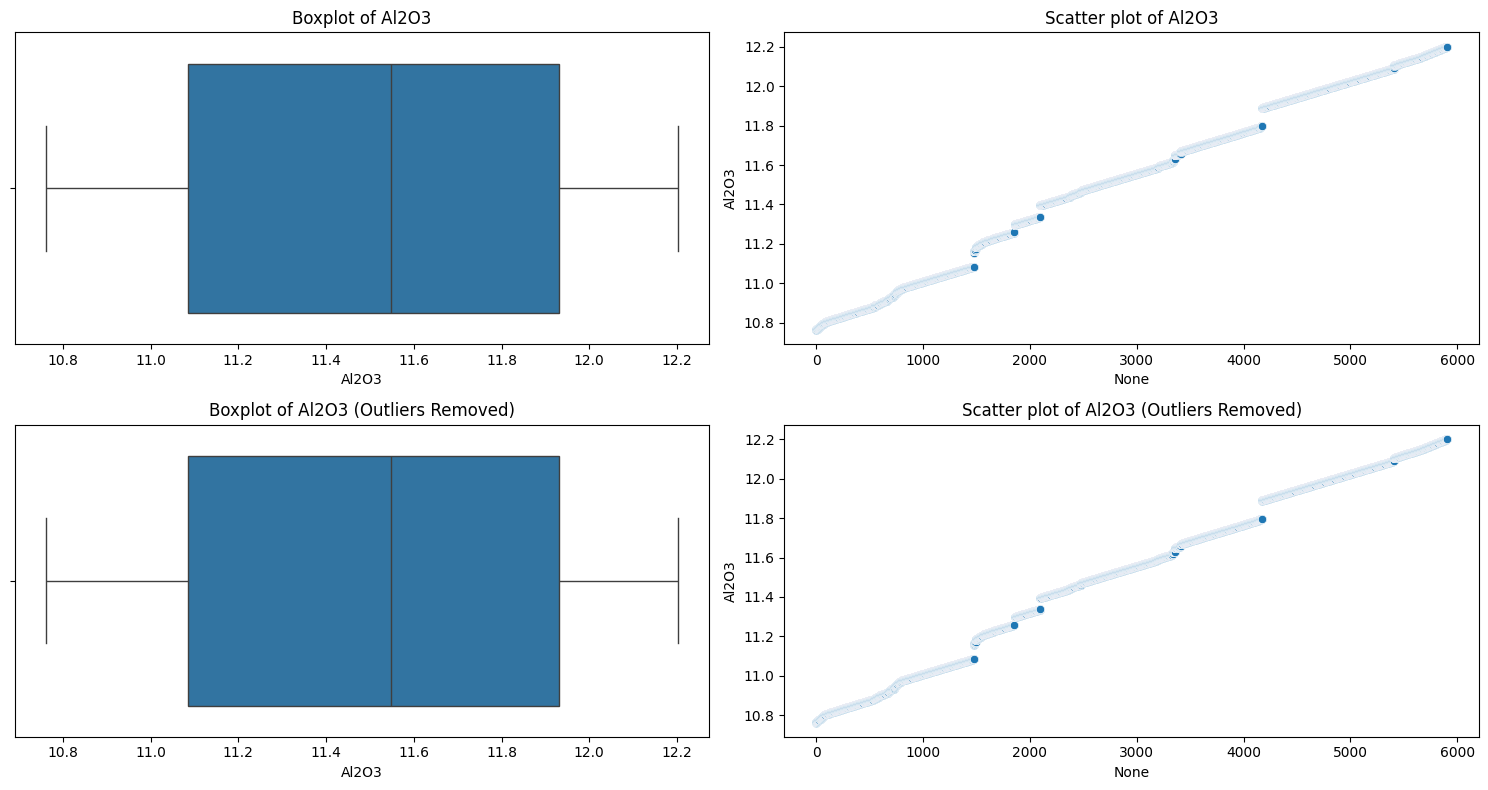

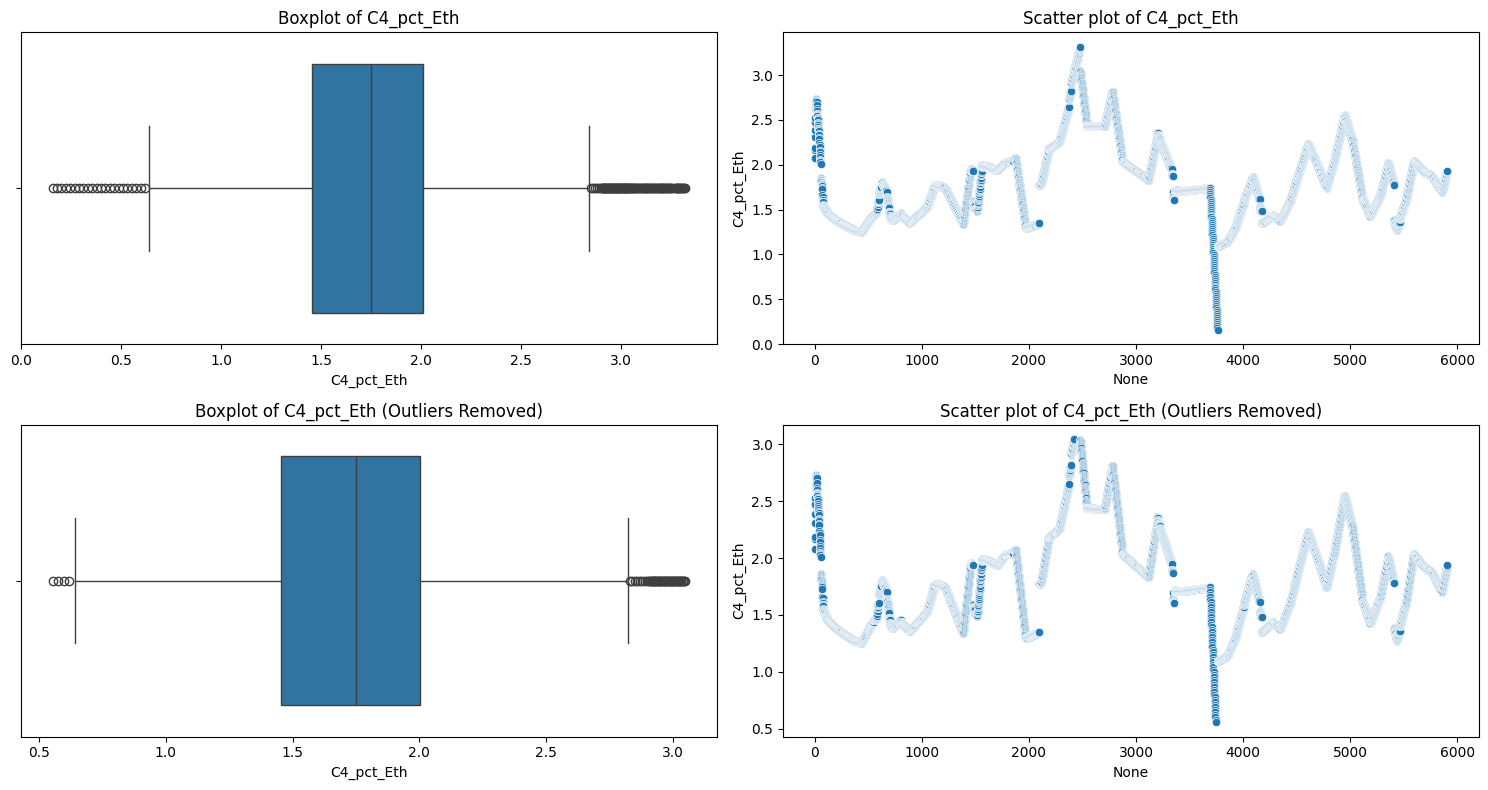

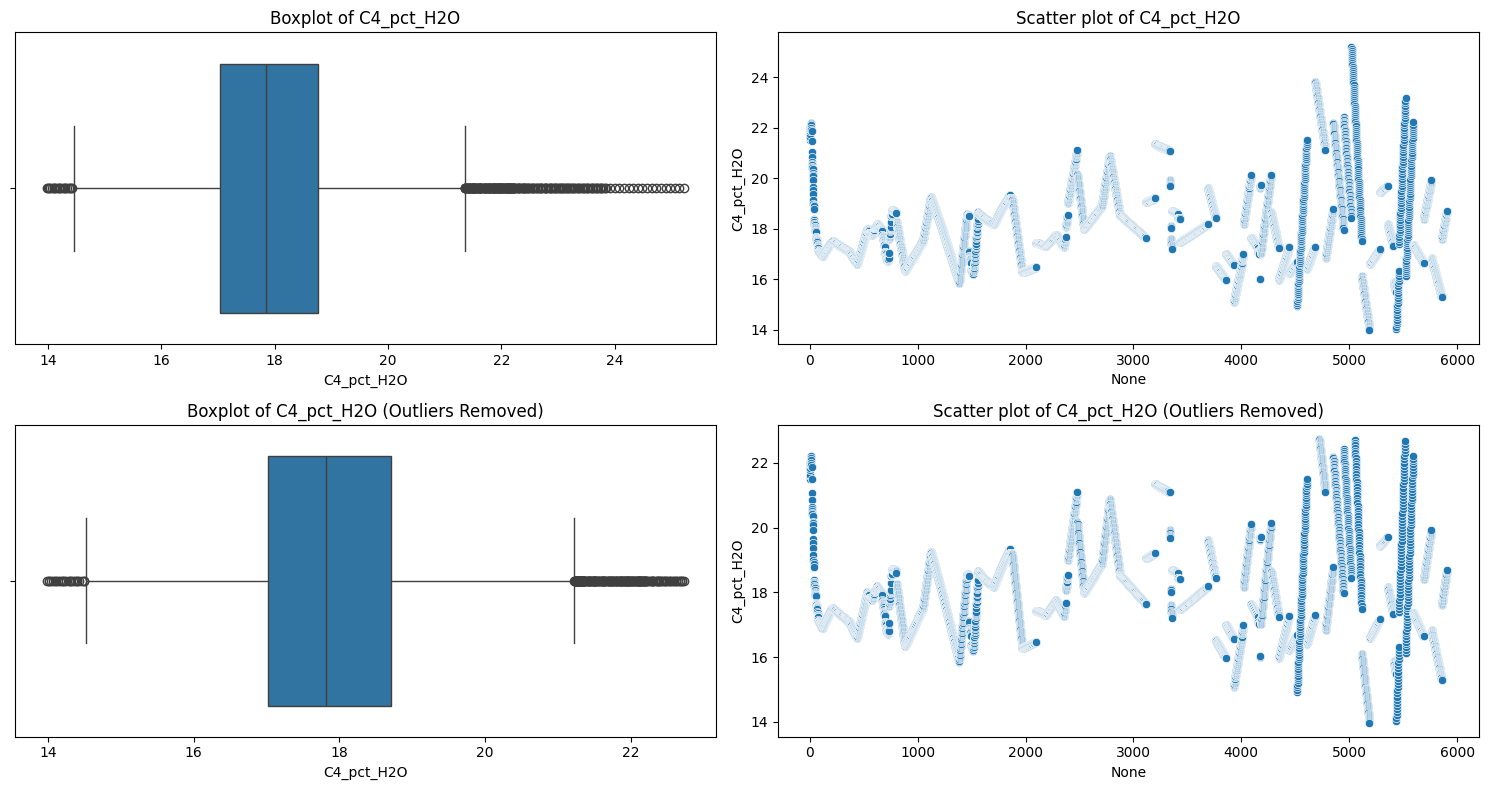

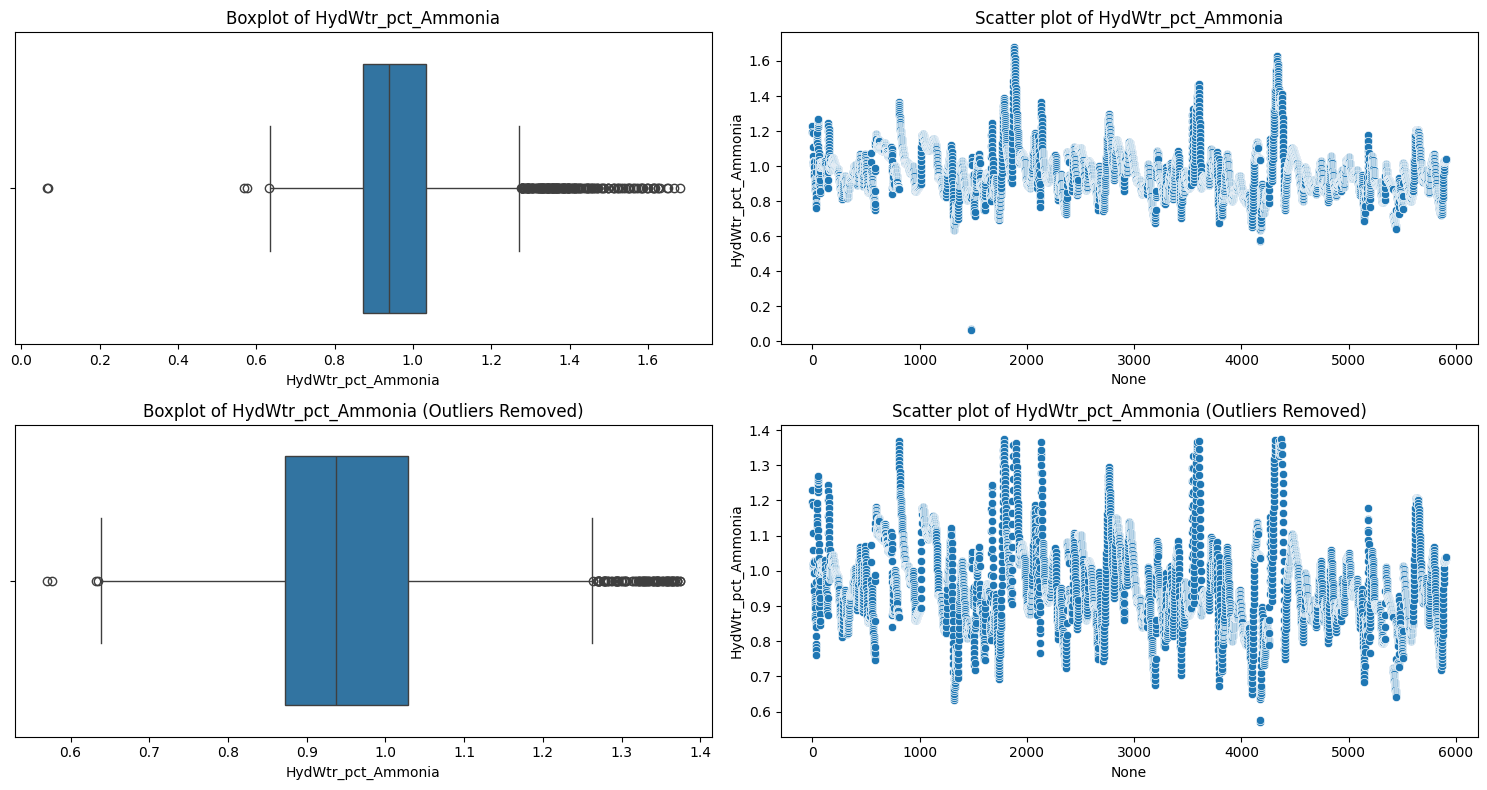

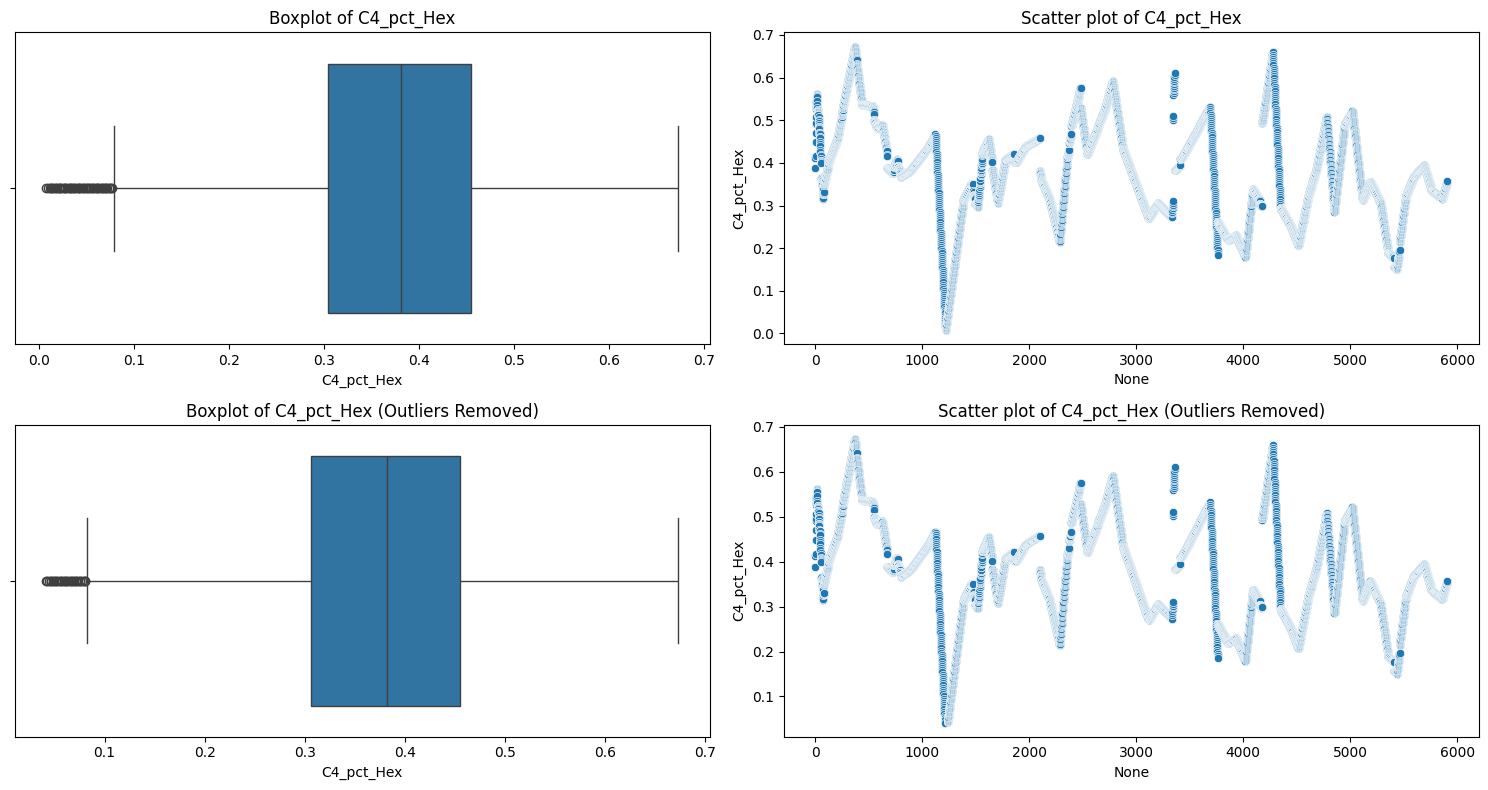

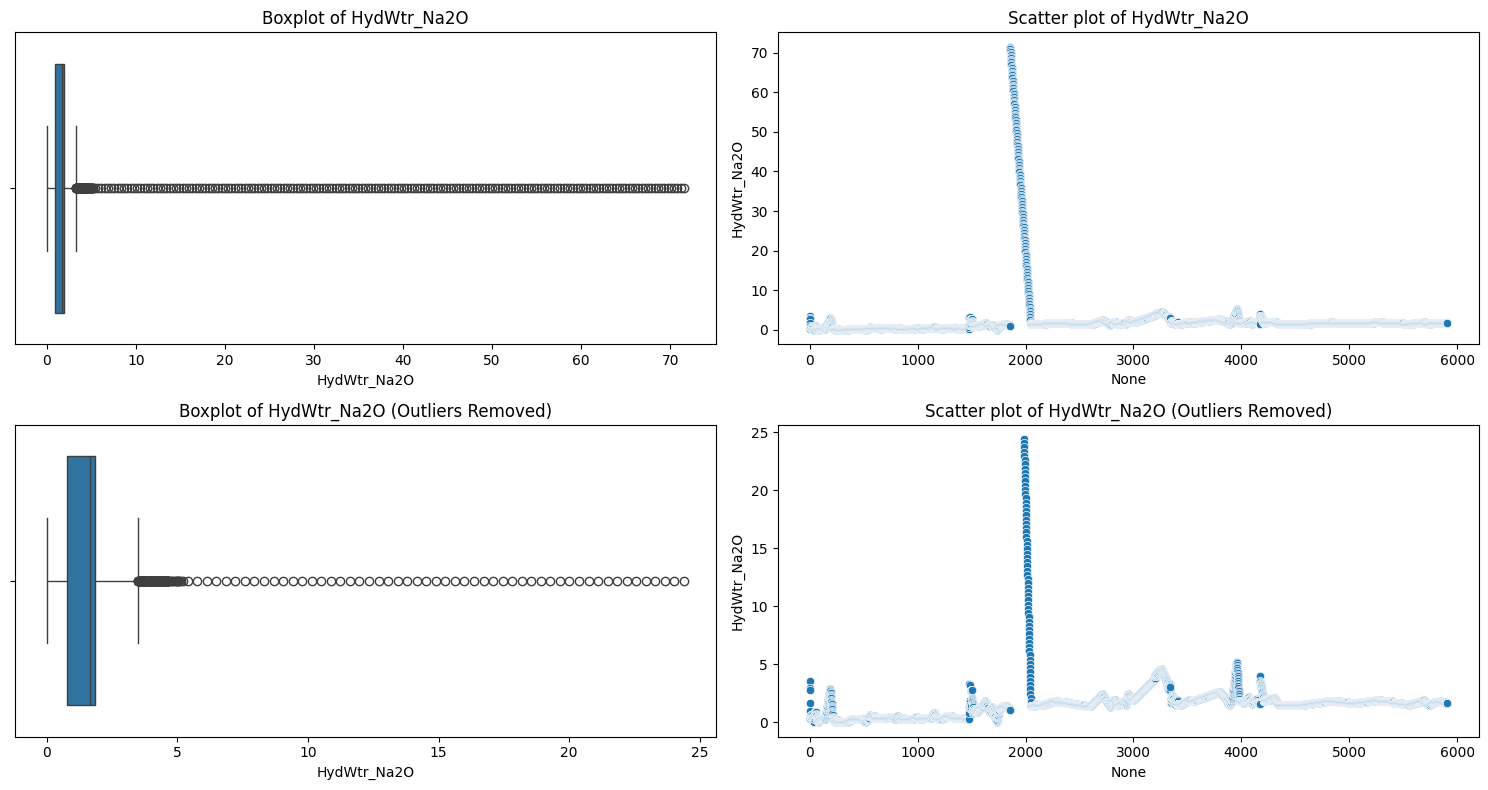

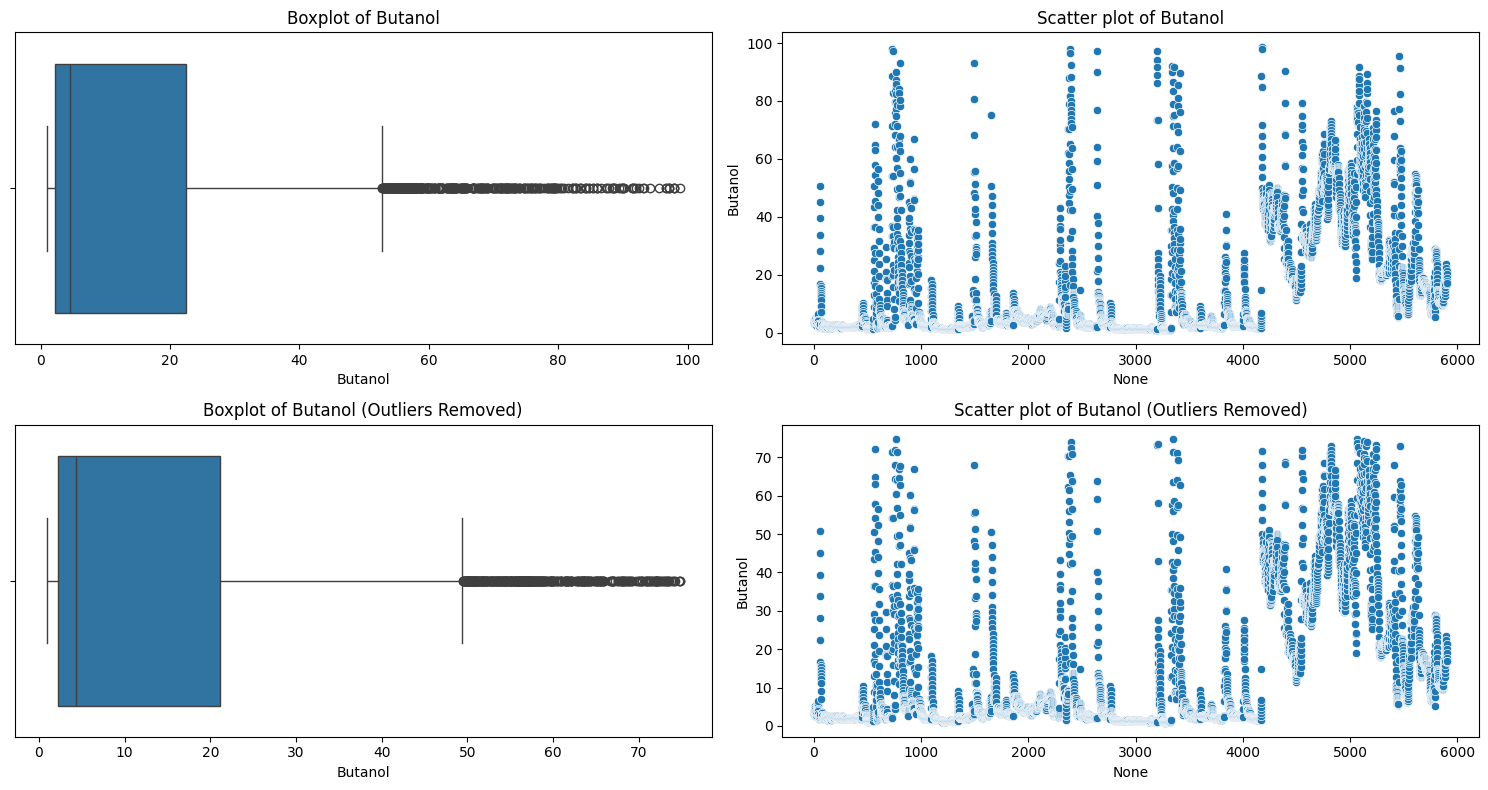

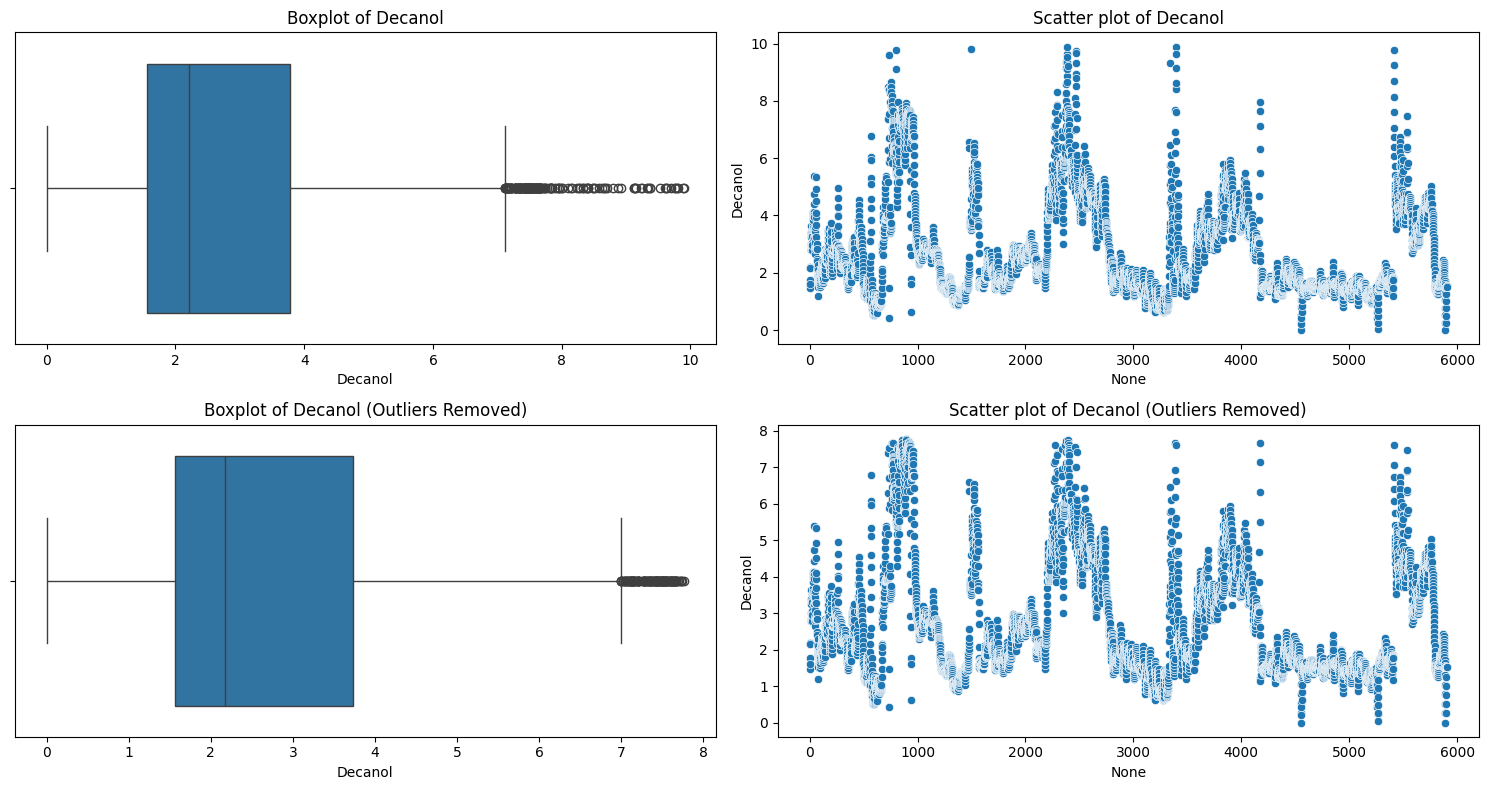

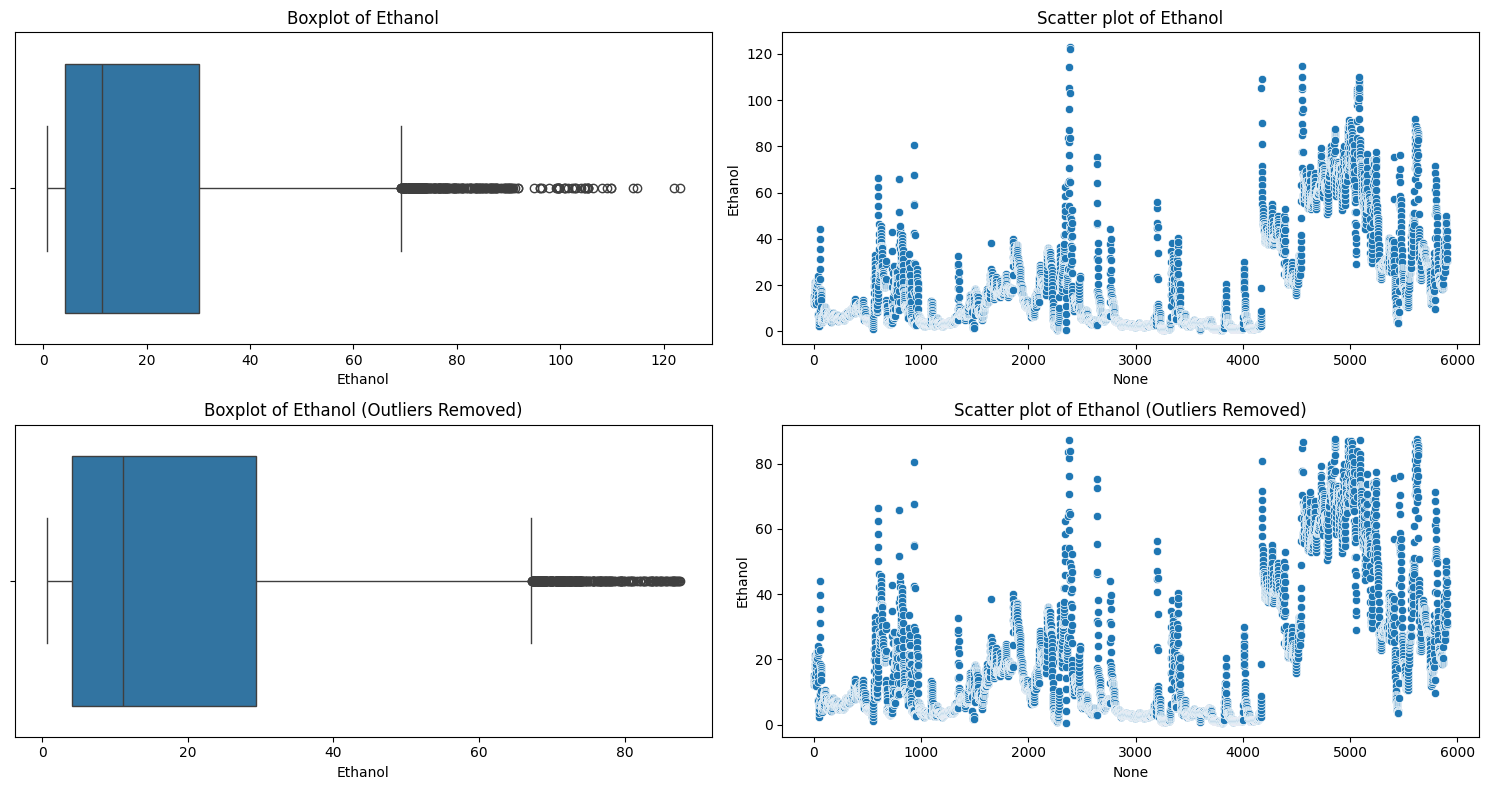

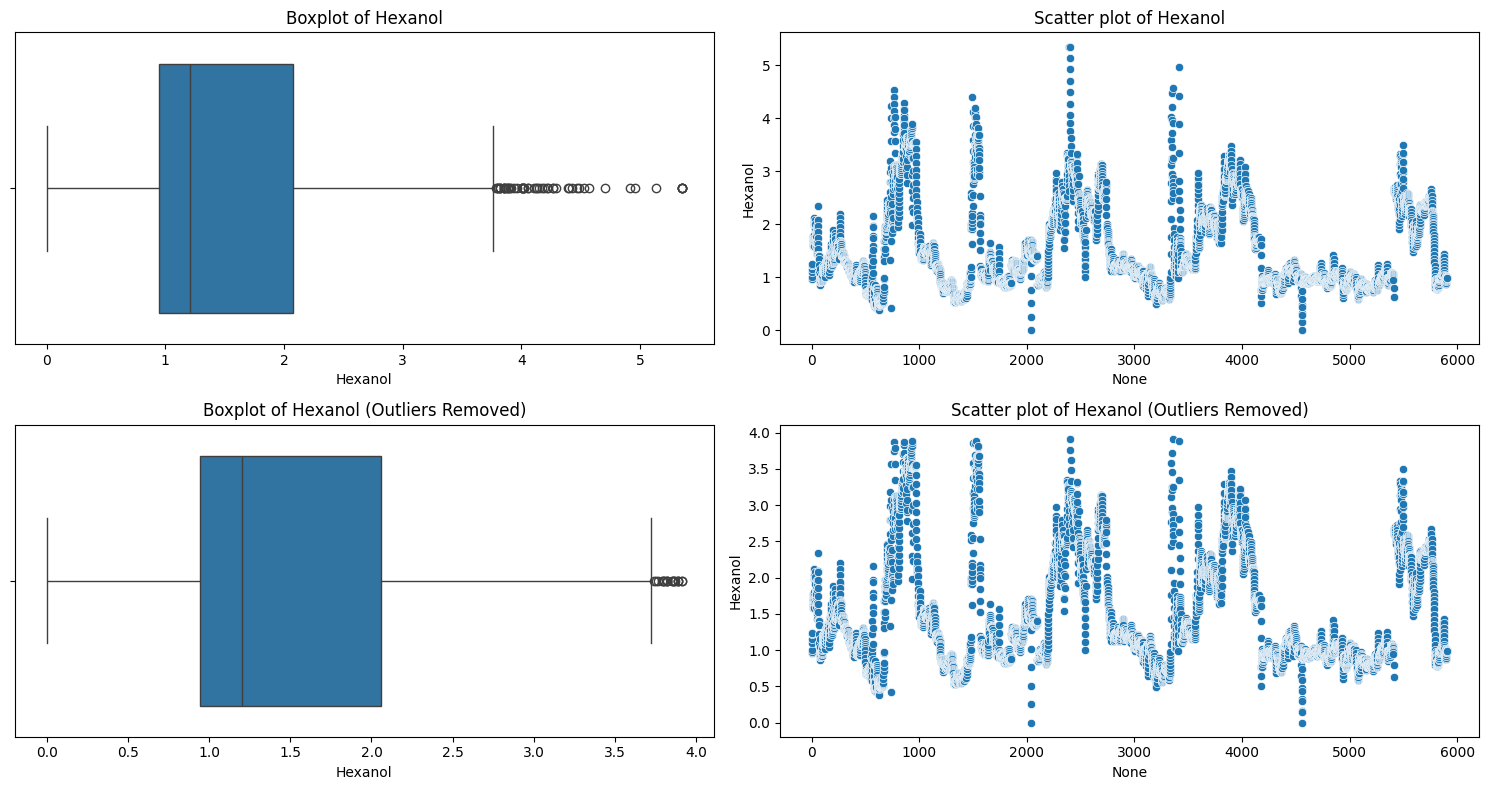

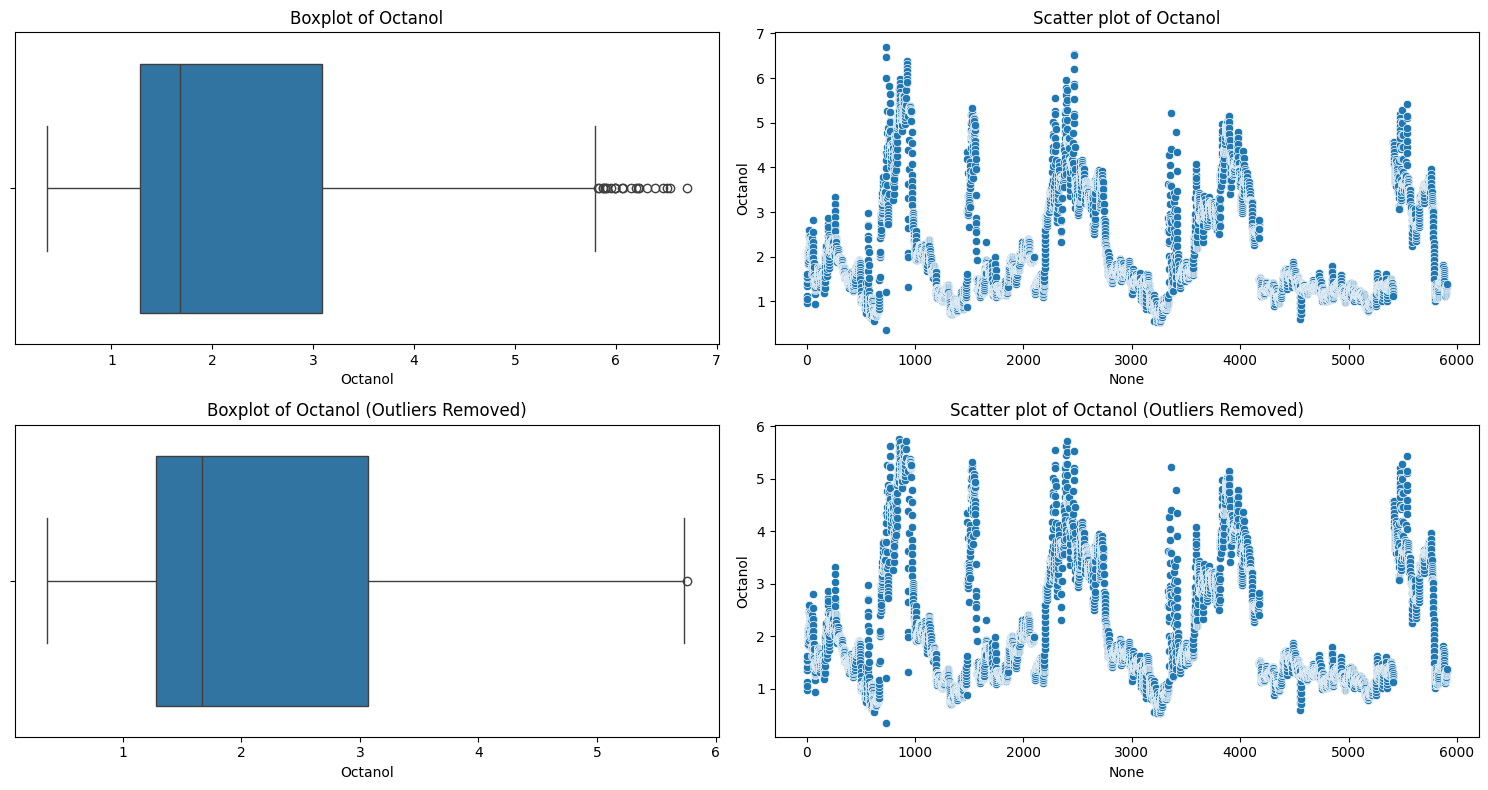

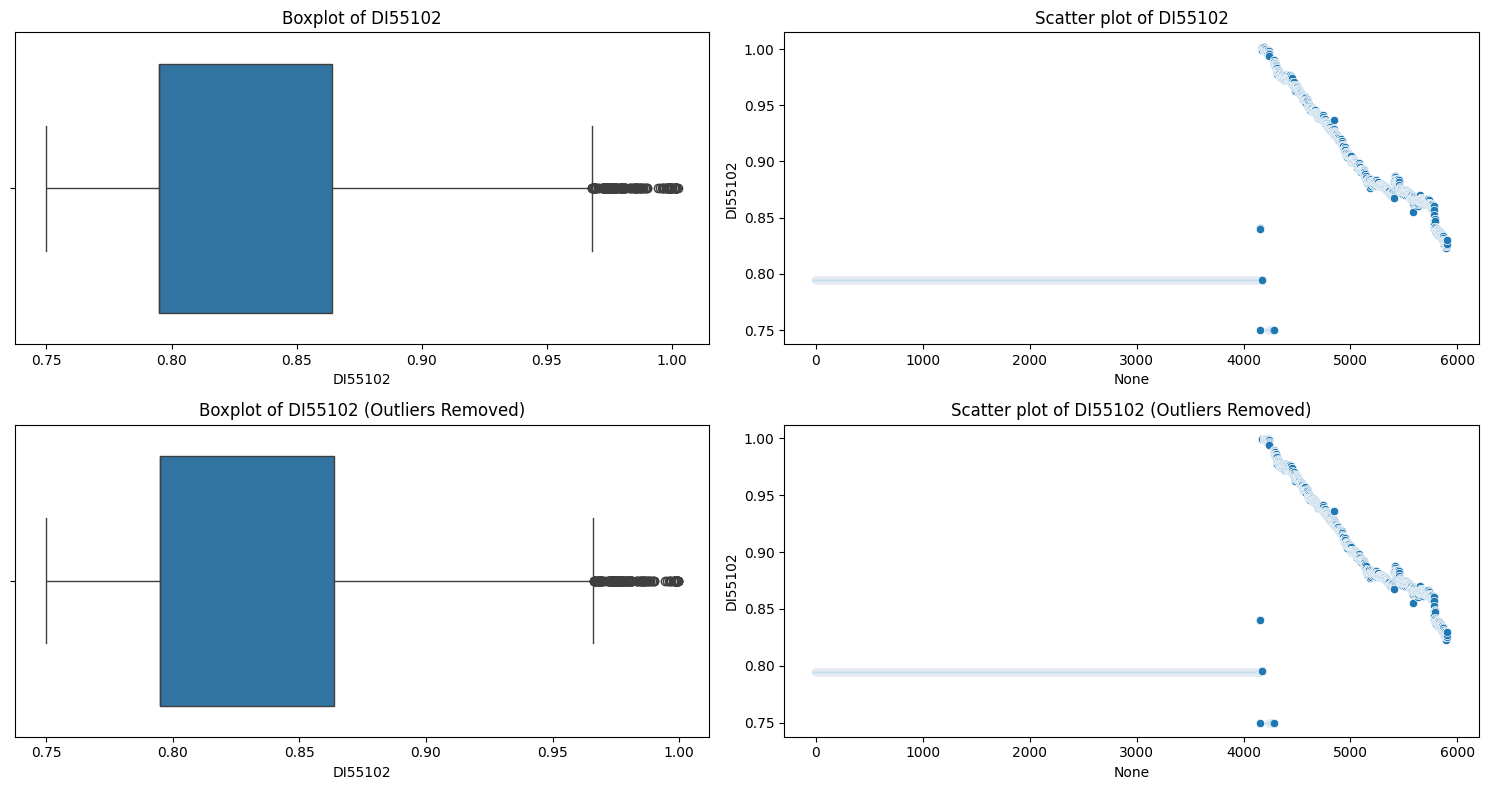

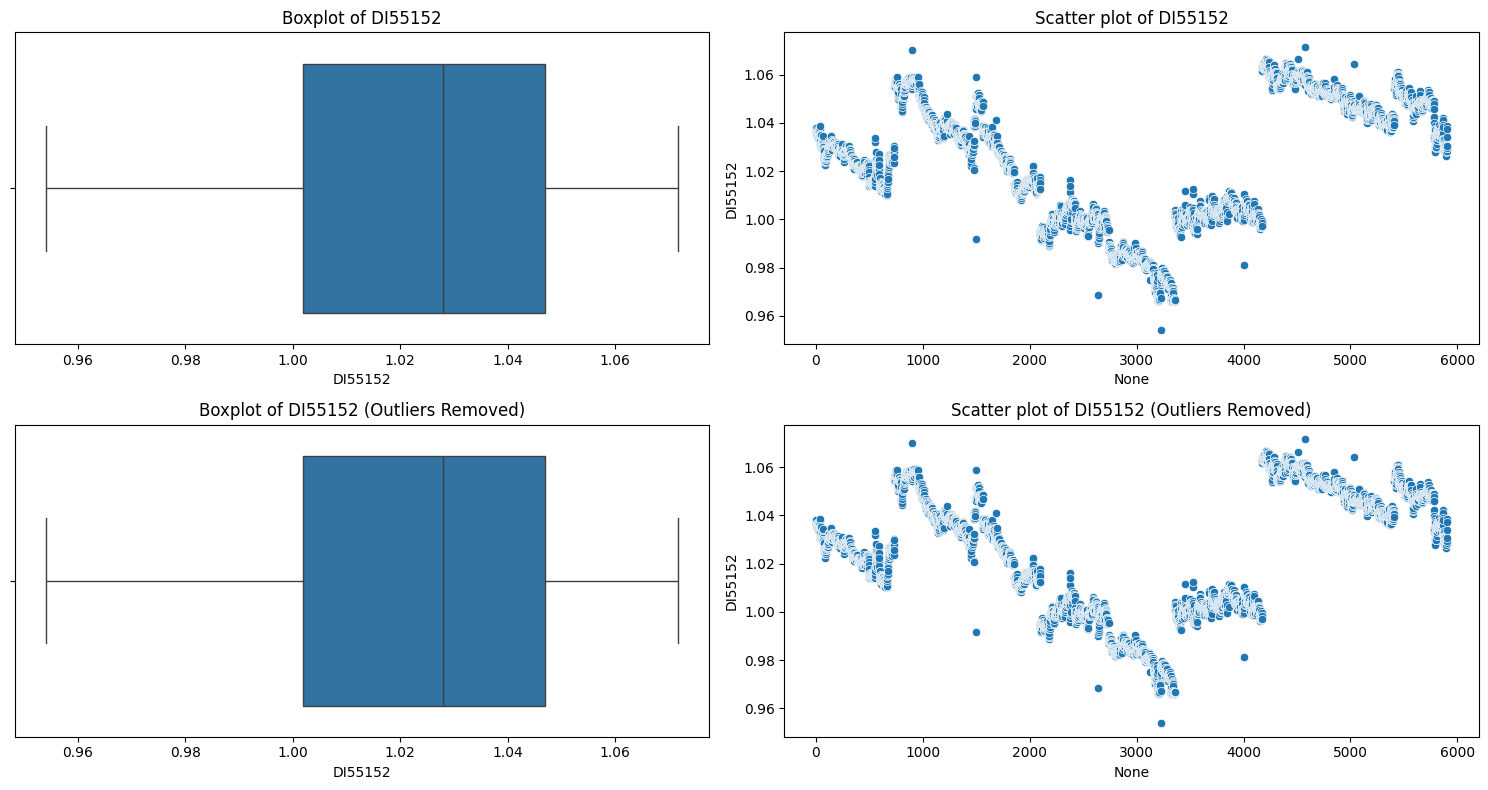

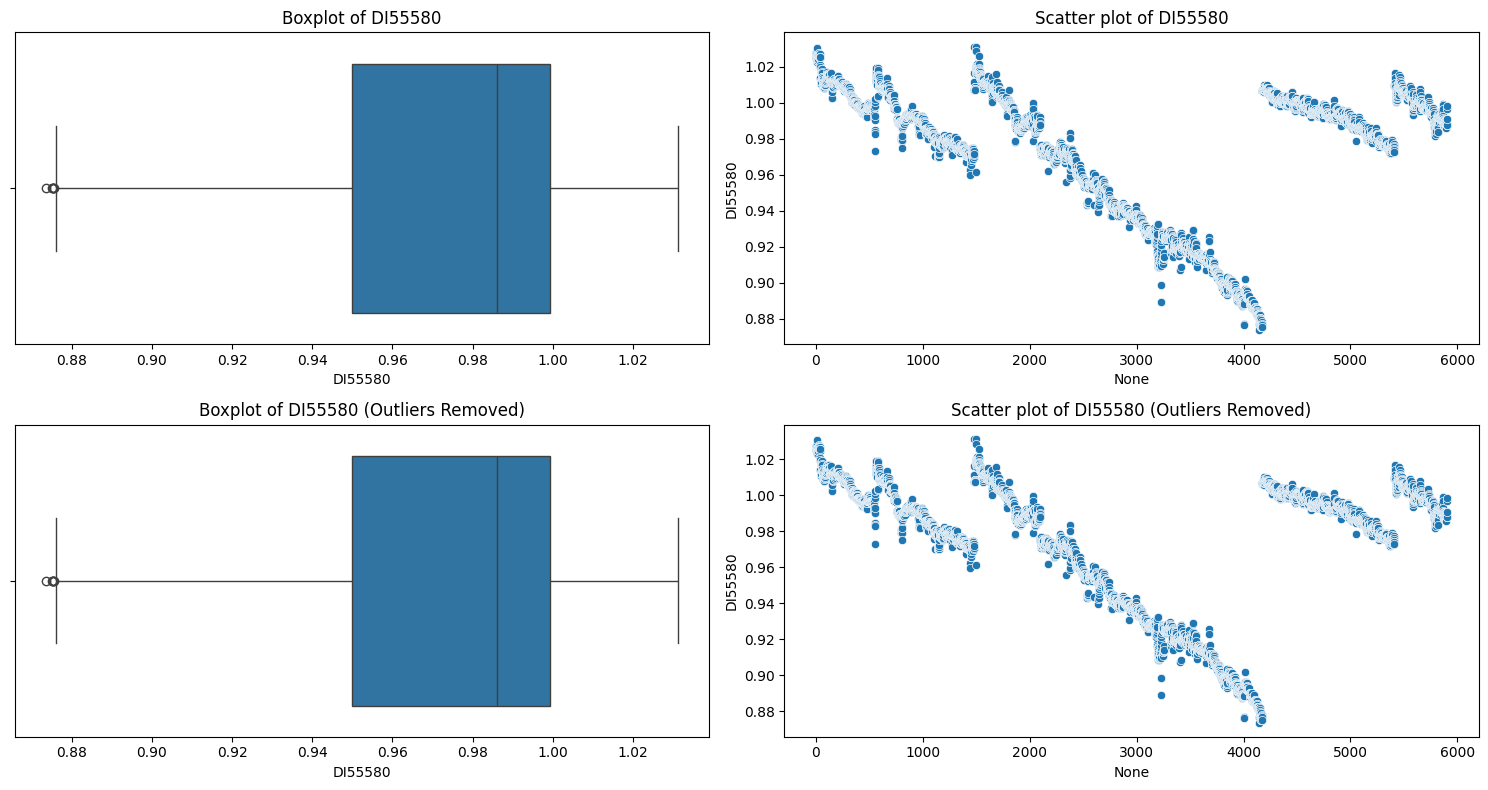

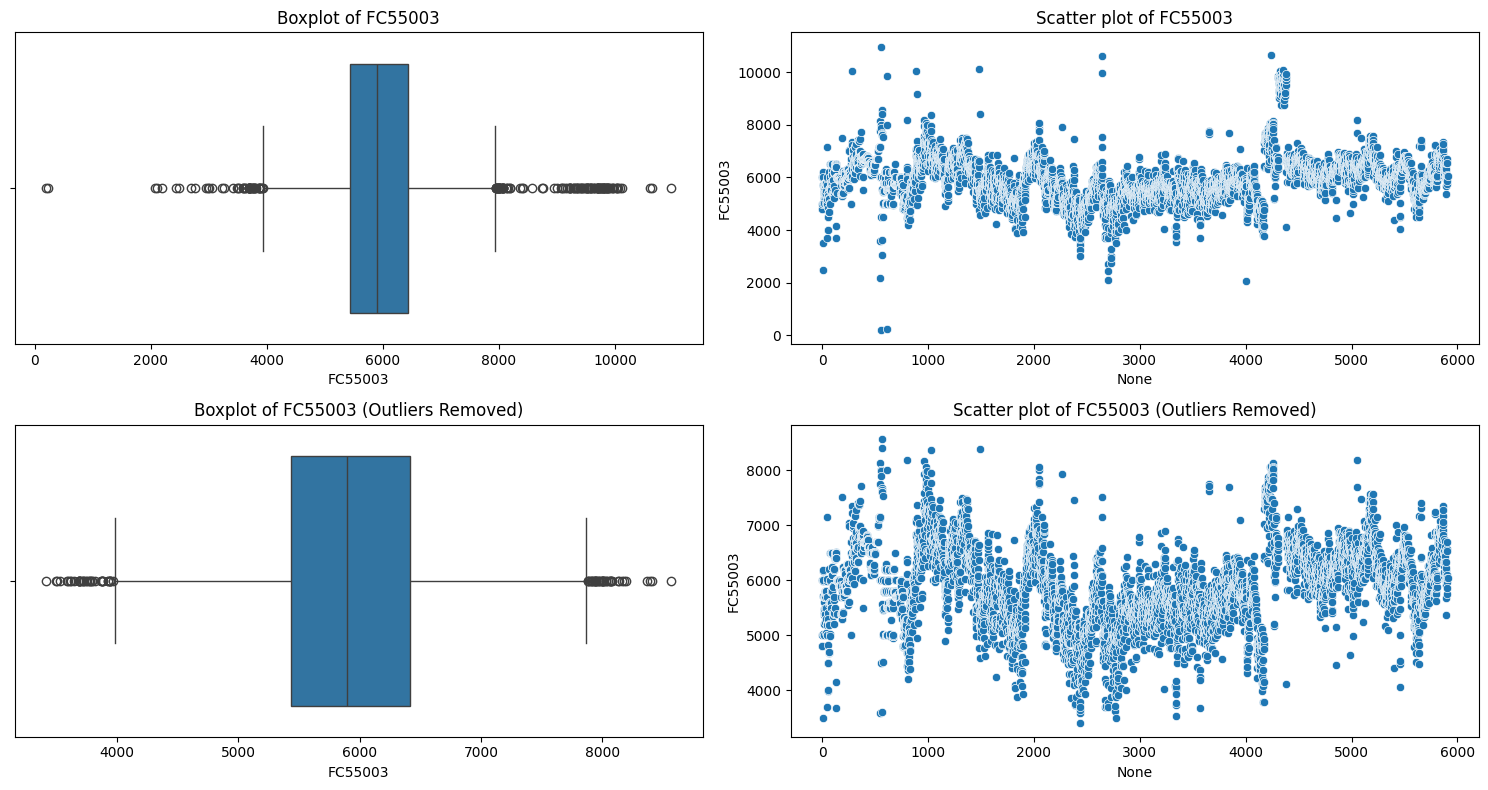

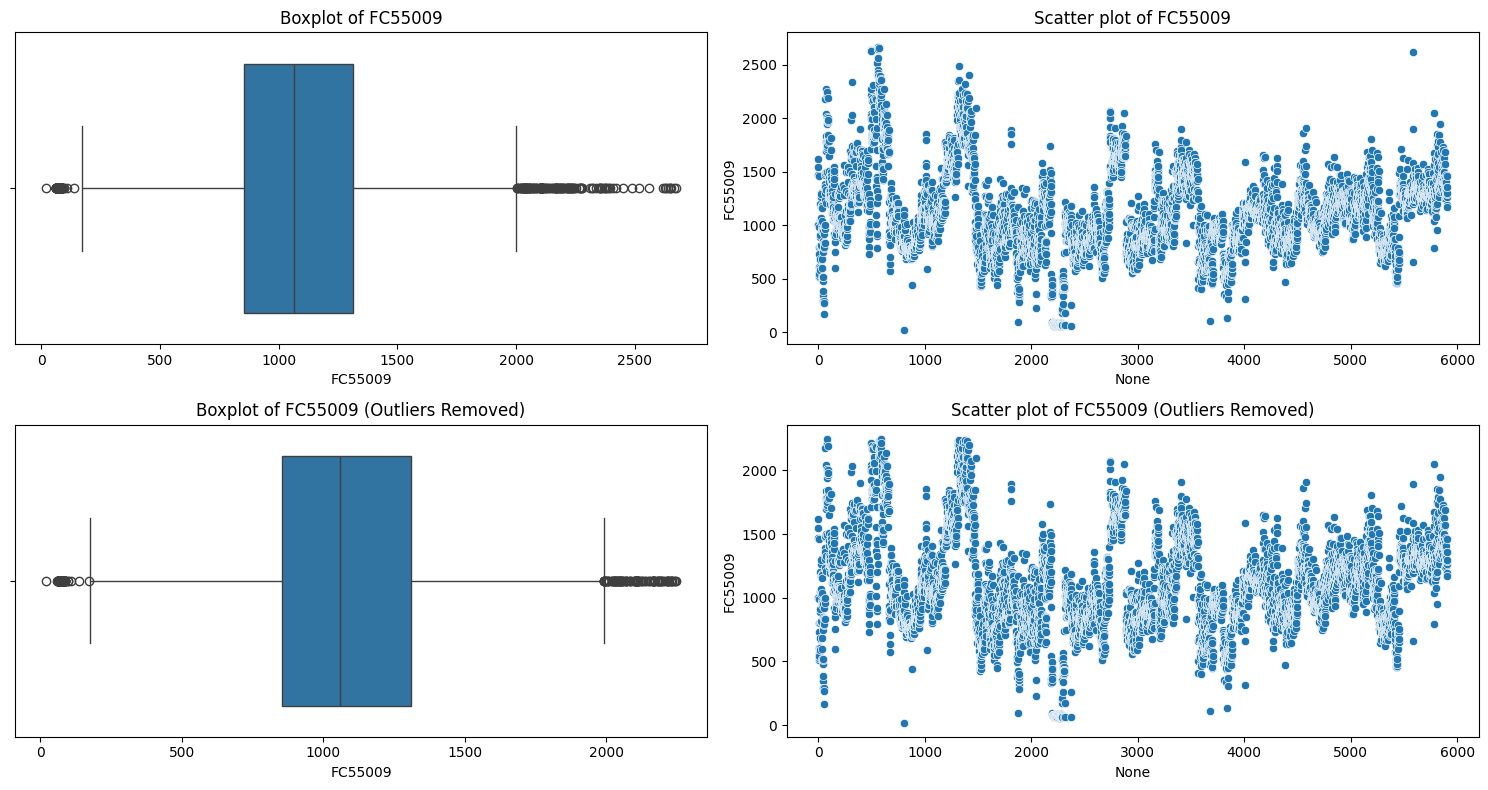

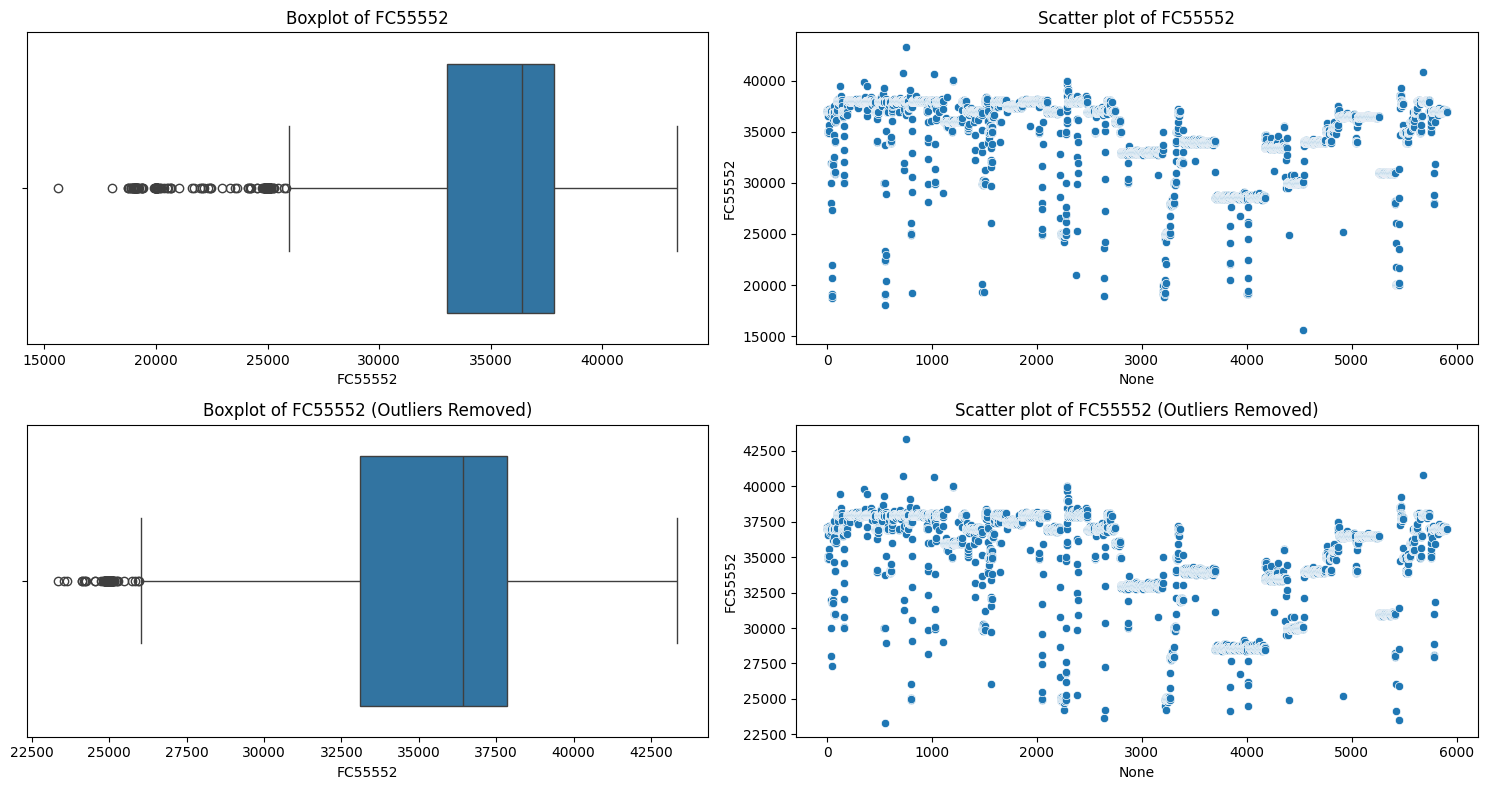

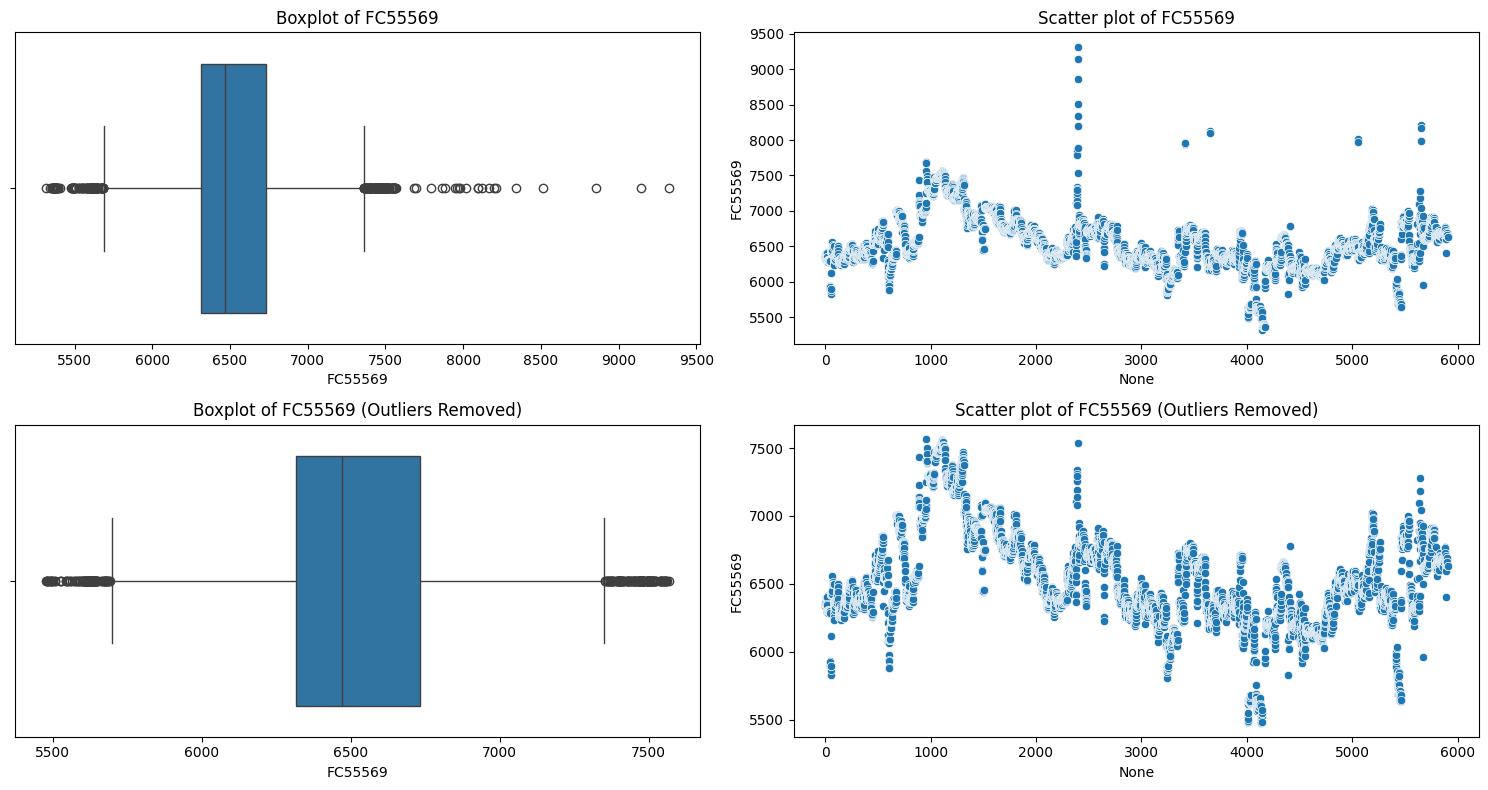

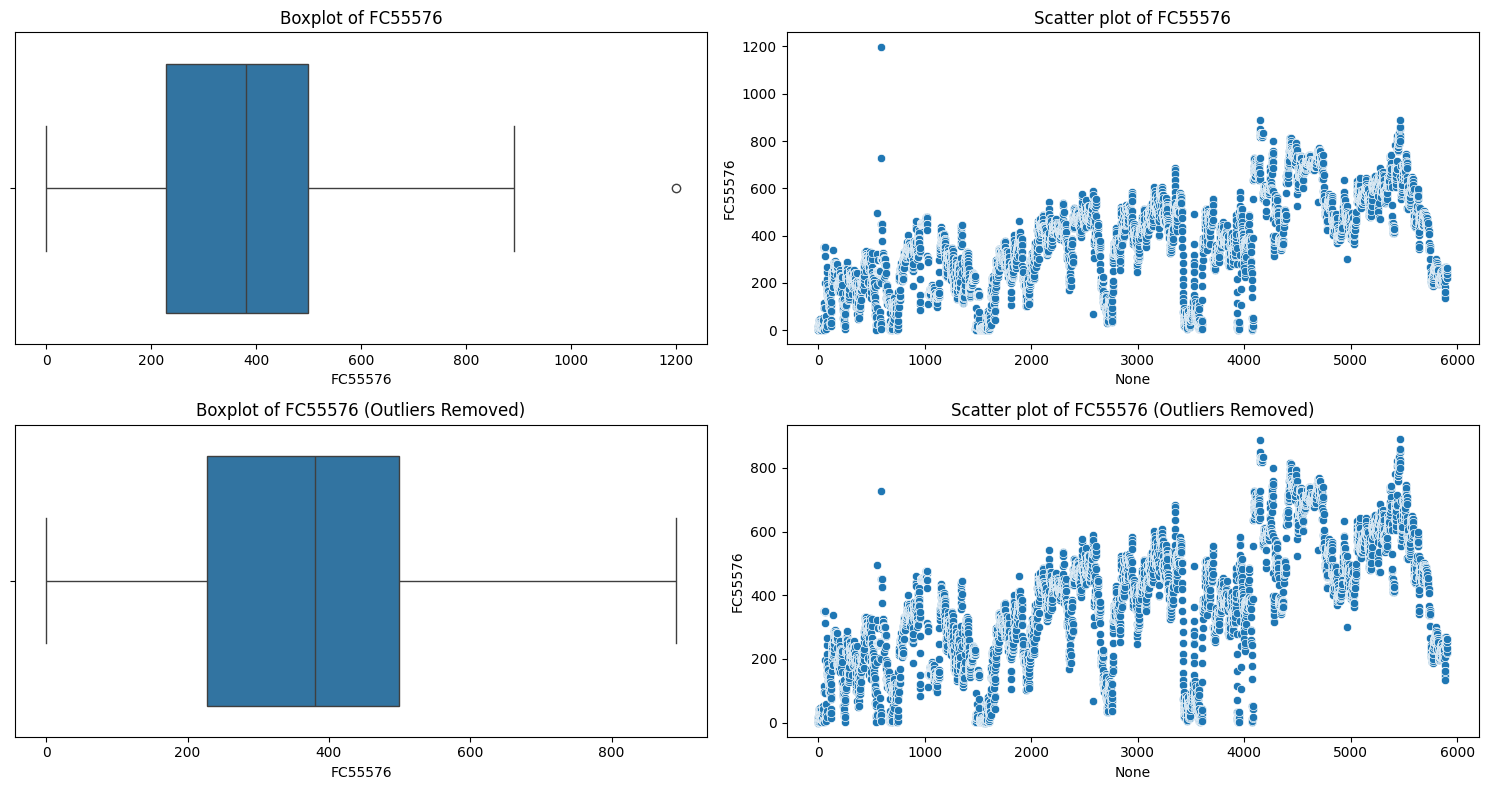

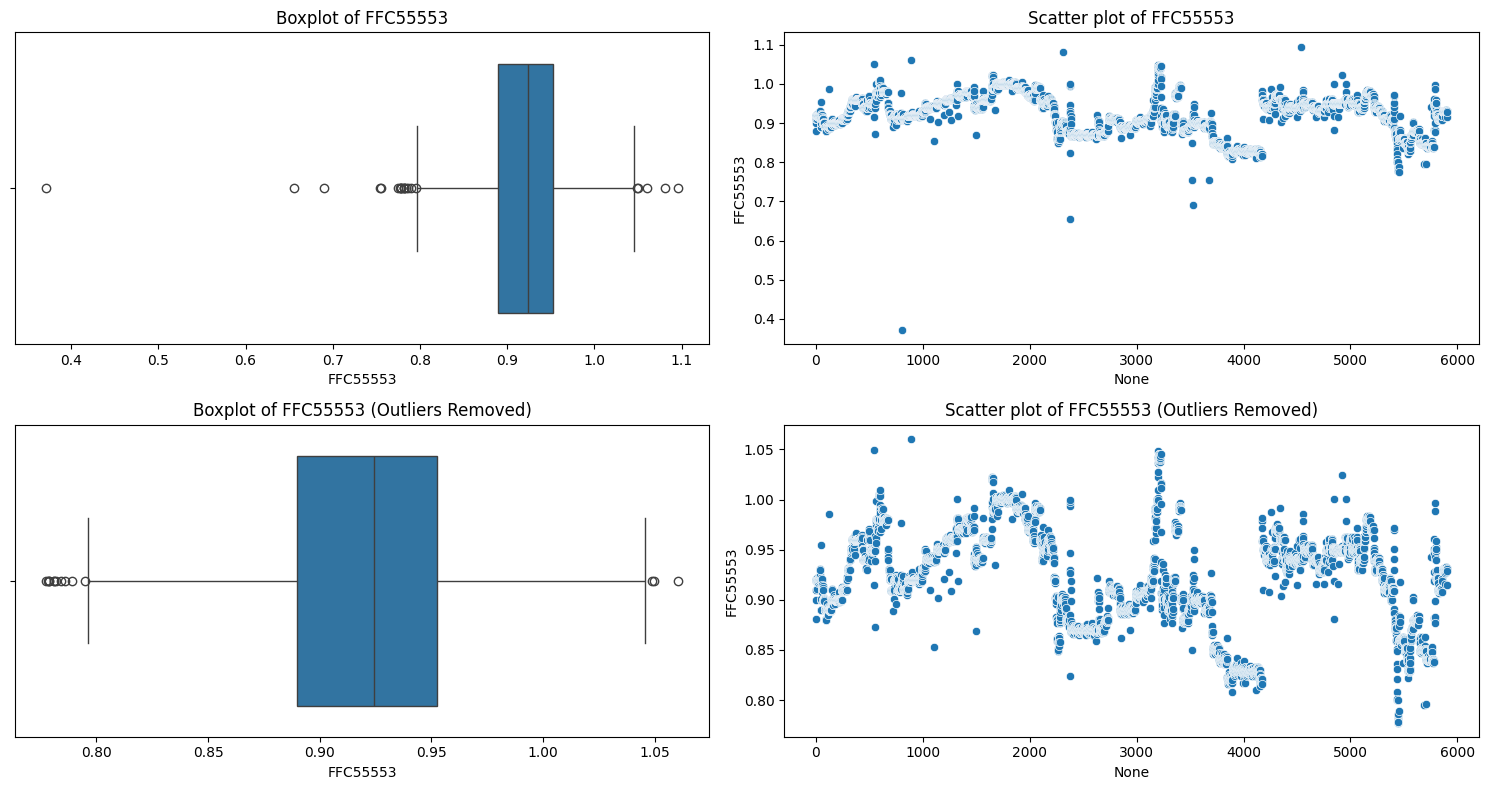

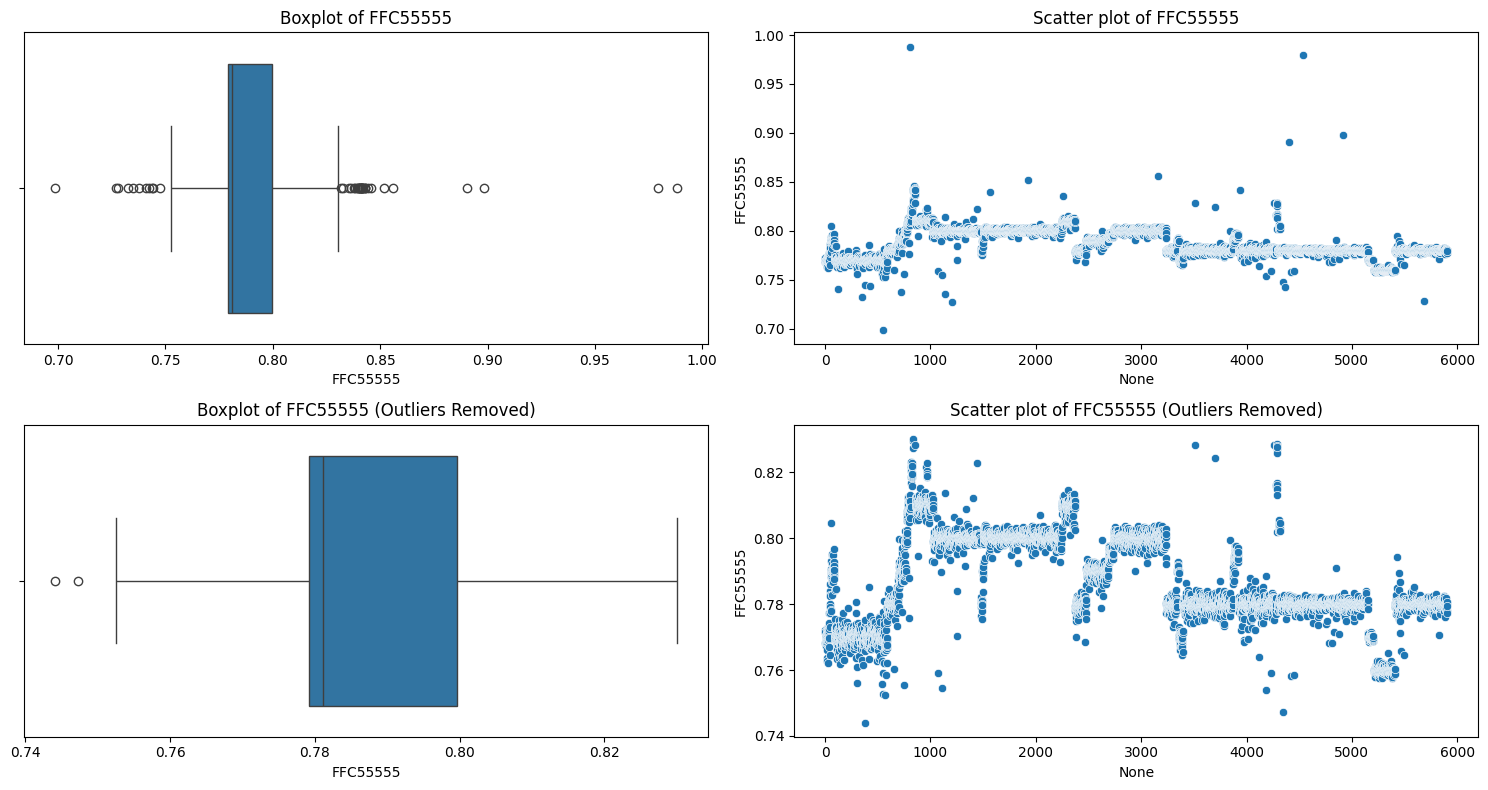

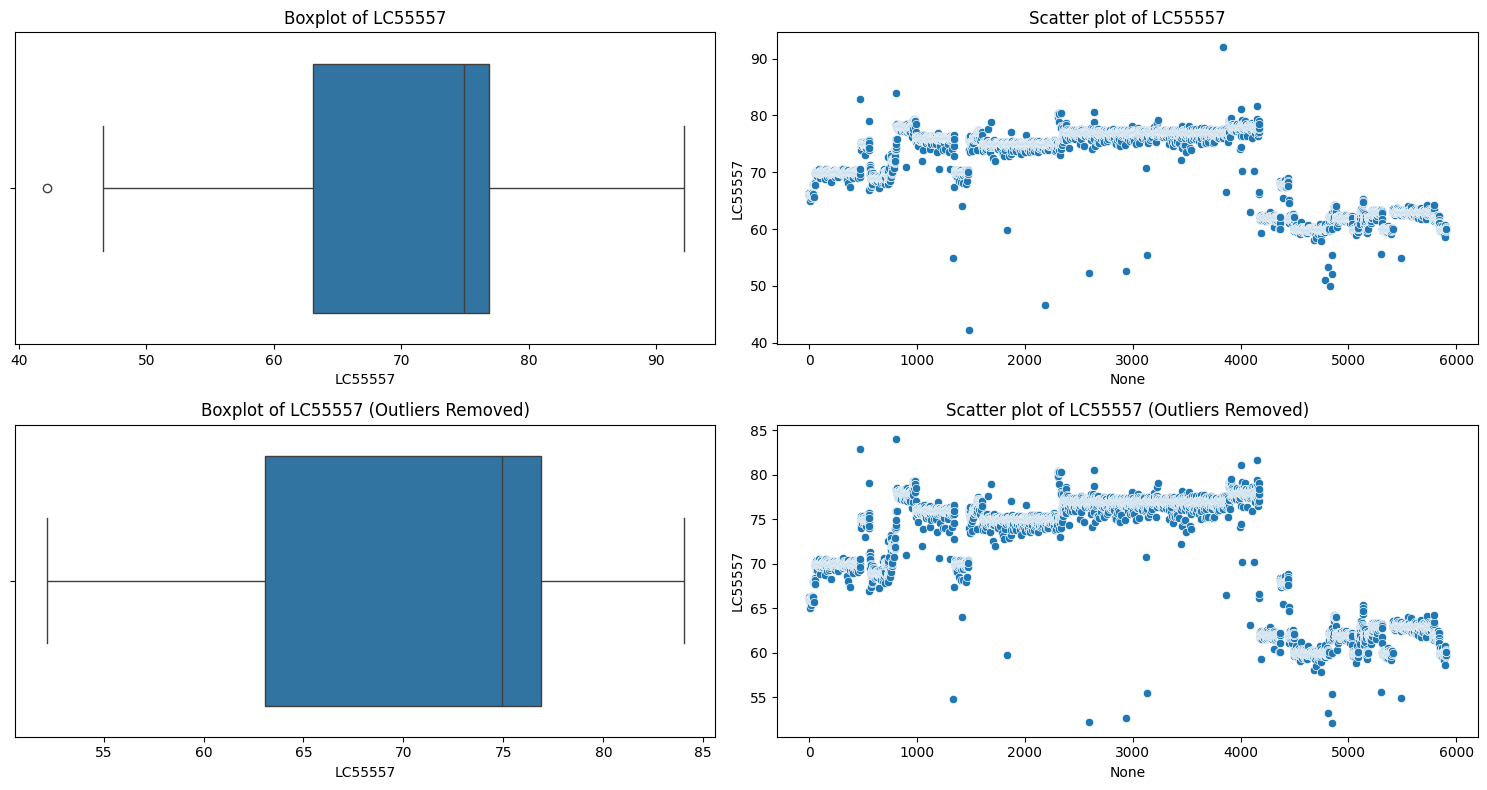

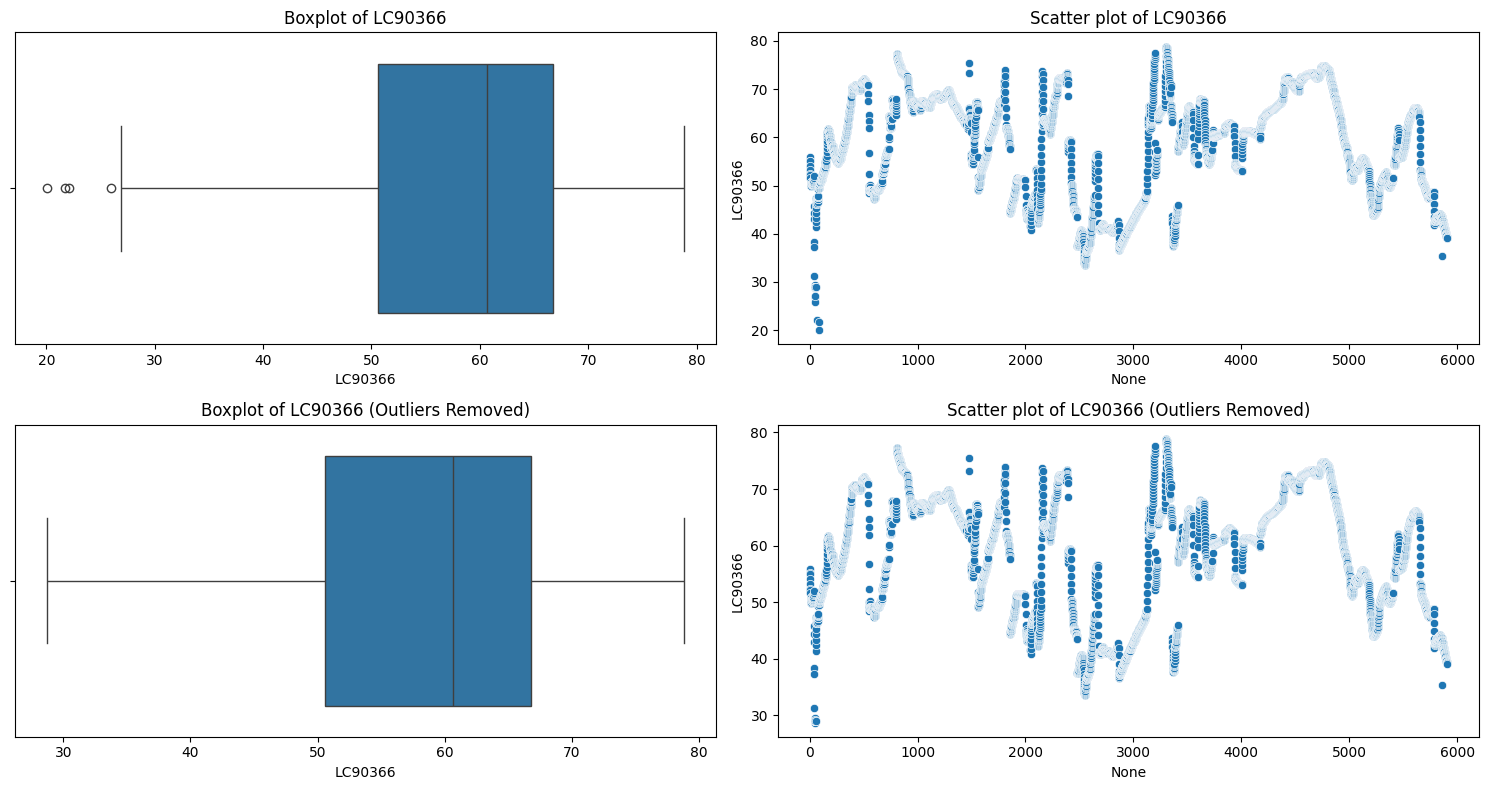

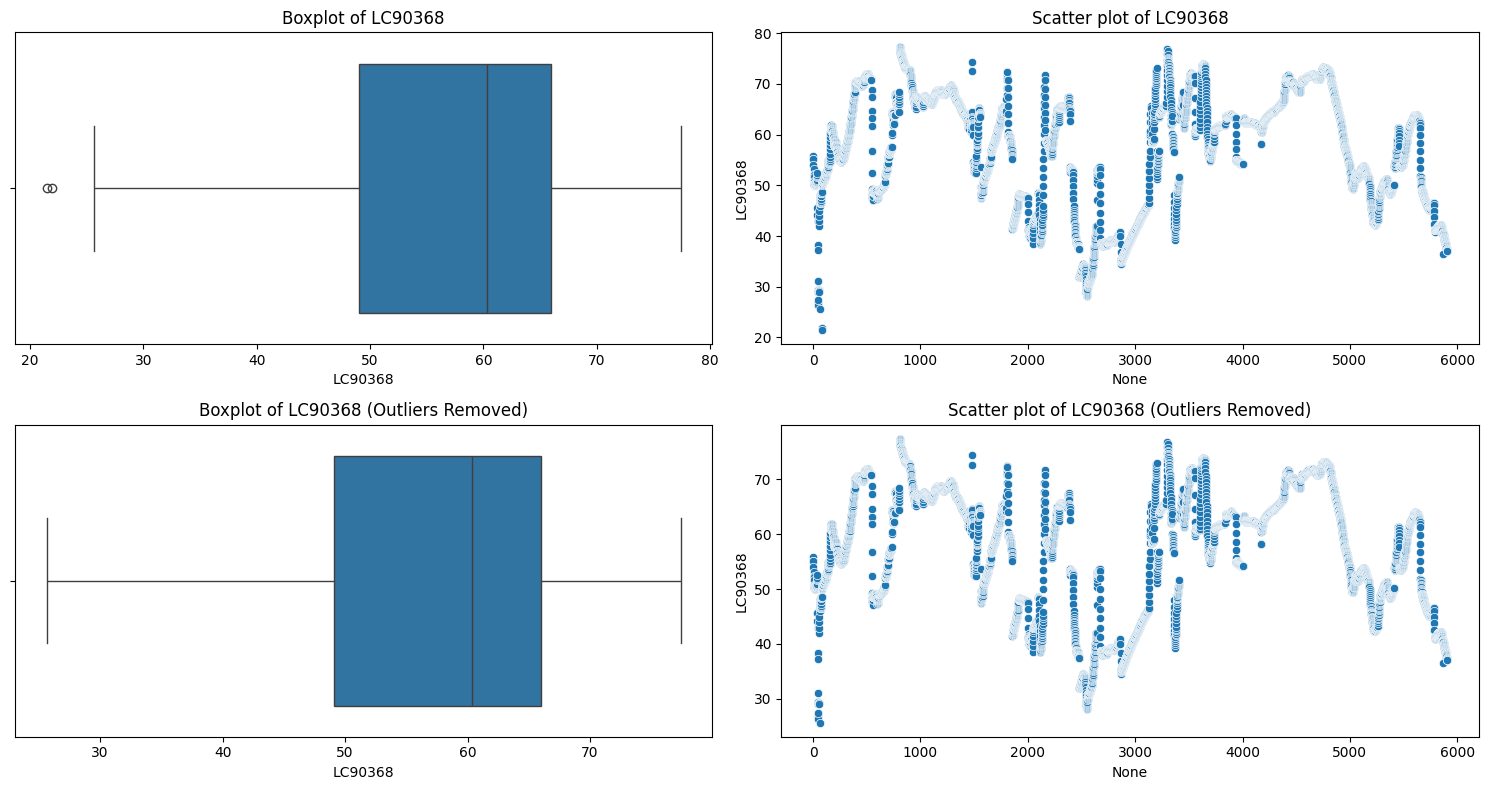

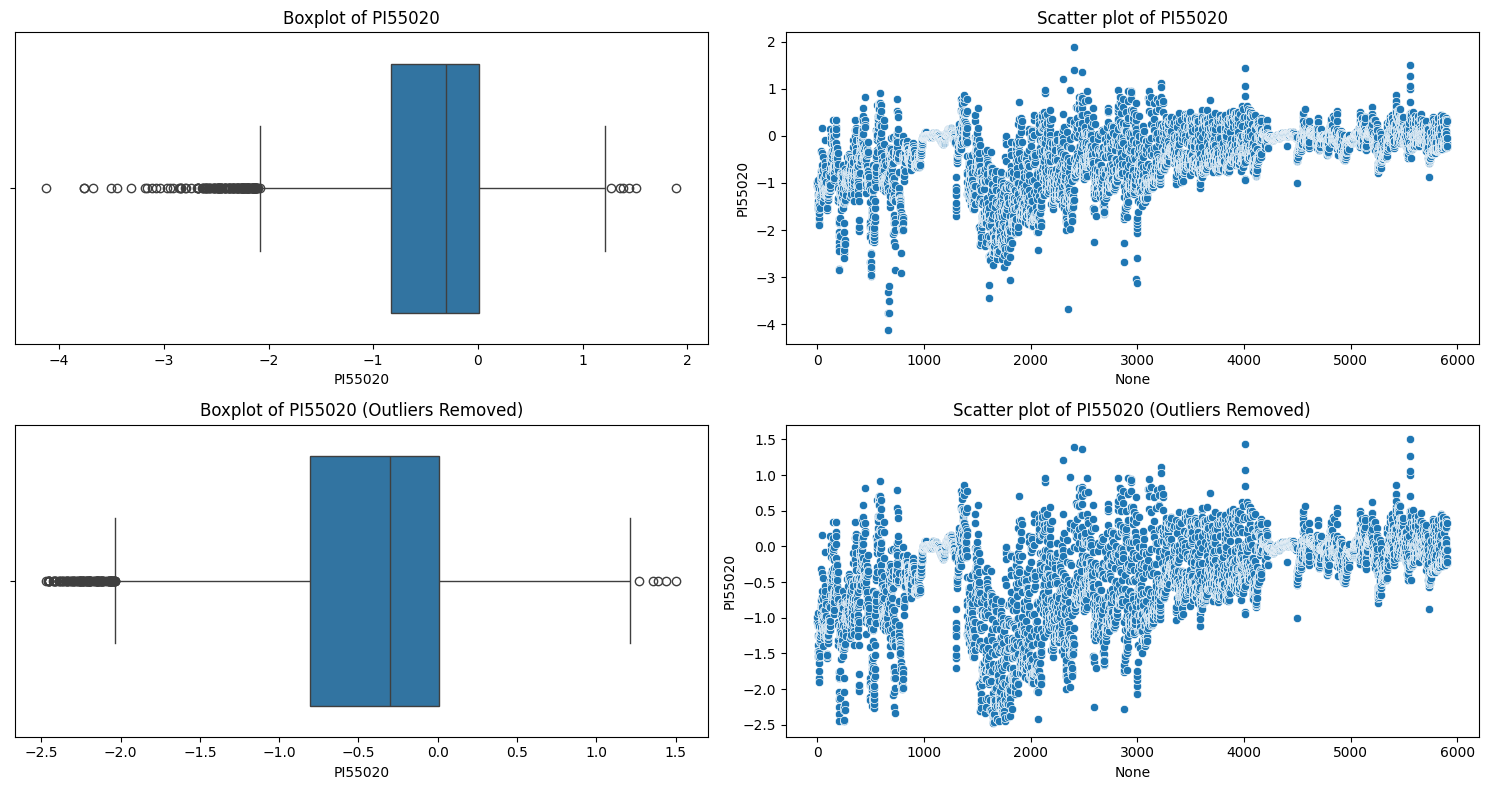

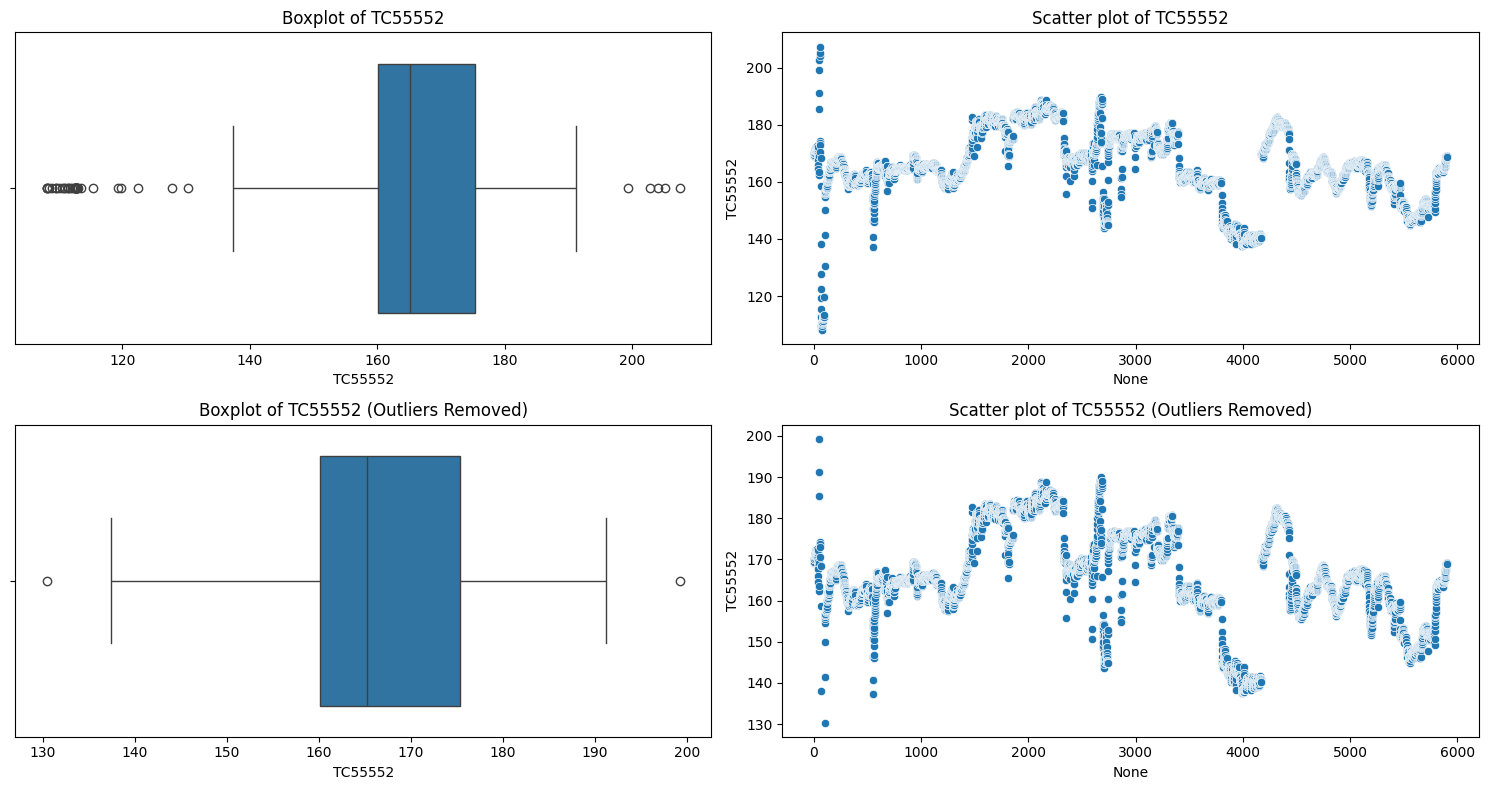

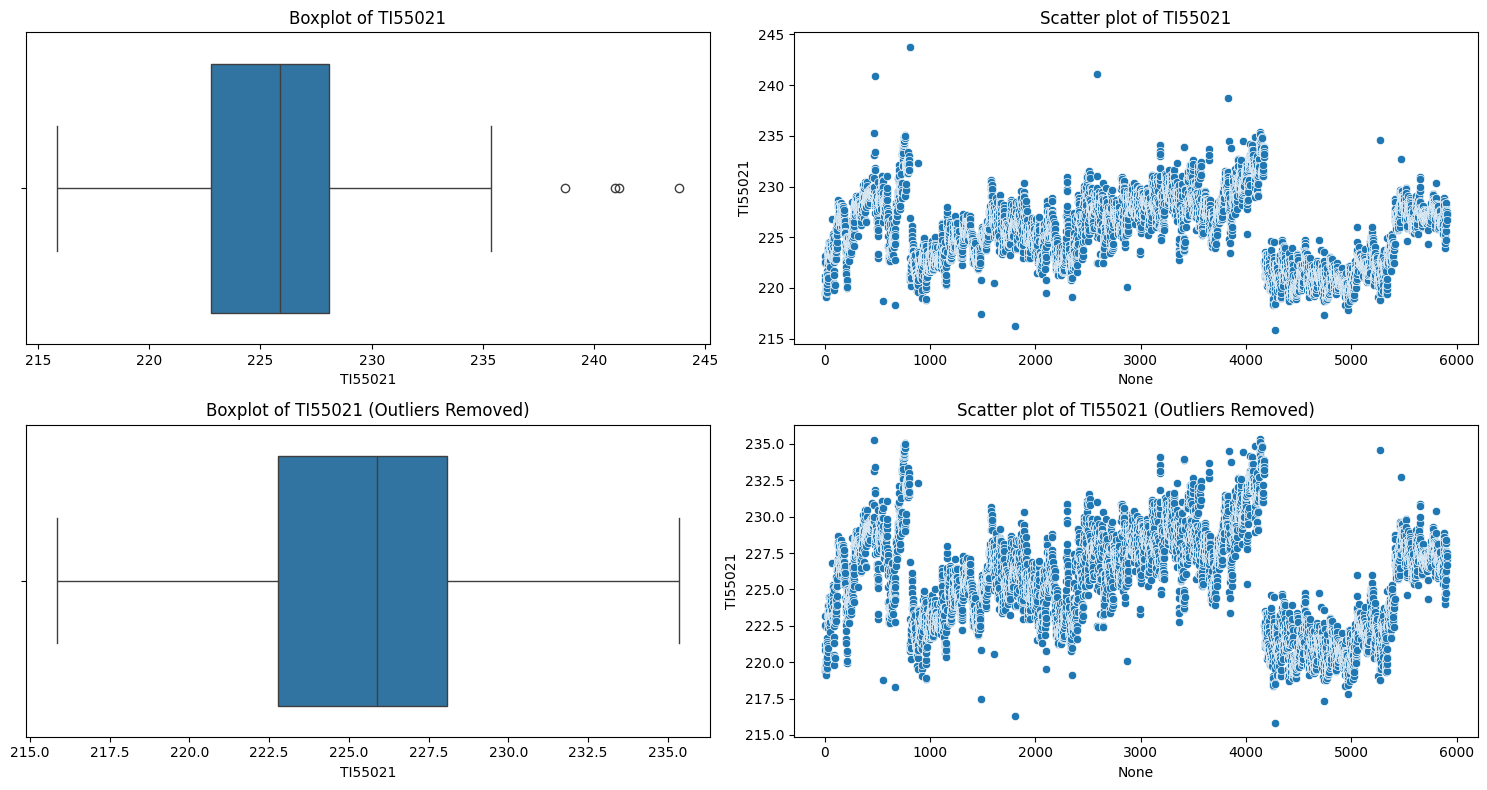

In [9]:

def plot_data(col, data):
    # Check for datetime column
    if pd.api.types.is_datetime64_any_dtype(data[col]):
        print(f"Skipping datetime column: {col}")
        return data[col], None

    # Remove outliers (> 3 standard deviations from the mean)
    mean_col = data[col].mean()
    std_col = data[col].std()
    filtered_col = data[col][((data[col] - mean_col) / std_col).abs() <= 3]

    plt.figure(figsize=(15, 8))

    plt.subplot(2, 2, 1)
    sns.boxplot(x=data[col])
    plt.title(f"Boxplot of {col}")

    plt.subplot(2, 2, 2)
    sns.scatterplot(x=data[col].index, y=data[col])
    plt.title(f"Scatter plot of {col}")

    plt.subplot(2, 2, 3)
    sns.boxplot(x=filtered_col)
    plt.title(f"Boxplot of {col} (Outliers Removed)")

    plt.subplot(2, 2, 4)
    sns.scatterplot(x=filtered_col.index, y=filtered_col)
    plt.title(f"Scatter plot of {col} (Outliers Removed)")

    plt.tight_layout()
    plt.show()

    return data[col], filtered_col

# Initialize dictionaries to store data
df_plotted = {}
df_plotted_Outliers_removed = {}

# Loop through each column to plot the data
for col in df_outlierHandling.columns:
    plotted, plotted_filtered = plot_data(col, df_outlierHandling)
    df_plotted[col] = plotted
    if plotted_filtered is not None:
        df_plotted_Outliers_removed[col] = plotted_filtered

# Convert the dictionaries to DataFrames
df_plotted = pd.DataFrame(df_plotted)
df_plotted_Outliers_removed = pd.DataFrame(df_plotted_Outliers_removed)

# Ensure "Date" column is present in df_plotted_Outliers_removed
if "Date" in df_outlierHandling.columns and "Date" not in df_plotted_Outliers_removed.columns:
    df_plotted_Outliers_removed["Date"] = df_outlierHandling["Date"]


In [10]:
# def plot_data(col, data, remove_outliers=False):
#     if pd.api.types.is_datetime64_any_dtype(data[col]):
#         print(f"Skipping datetime column: {col}")
#         return data[col], data[col]  # keep datetime columns as they are

# def plot_data(col, data, remove_outliers=False):
#     if pd.api.types.is_datetime64_any_dtype(data[col]):
#         print(f"Skipping datetime column: {col}")
#         return data[col], None  # keep datetime columns as they are

#     # Remove outliers (> 3 standard deviations from the mean)
#     mean_col = data[col].mean()
#     std_col = data[col].std()
#     filtered_col = data[col][((data[col] - mean_col) / std_col).abs() <= 3]

#     plt.figure(figsize=(15, 8))

#     plt.subplot(2, 2, 1)
#     sns.boxplot(x=data[col])
#     plt.title(f"Boxplot of {col}")

#     plt.subplot(2, 2, 2)
#     sns.scatterplot(x=data[col].index, y=data[col])
#     plt.title(f"Scatter plot of {col}")

#     plt.subplot(2, 2, 3)
#     sns.boxplot(x=filtered_col)
#     plt.title(f"Boxplot of {col} (Outliers Removed)")

#     plt.subplot(2, 2, 4)
#     sns.scatterplot(x=filtered_col.index, y=filtered_col)
#     plt.title(f"Scatter plot of {col} (Outliers Removed)")

#     plt.tight_layout()
#     plt.show()

#     return data[col], filtered_col

# # Create empty dictionaries to hold the Series
# df_plotted = {}
# df_plotted_Outliers_removed = {}

# # Loop through each column to plot the data
# for col in df_outlierHandling.columns:
#     plotted, plotted_filtered = plot_data(col, df_outlierHandling, remove_outliers=True)
#     df_plotted[col] = plotted
#     if plotted_filtered is not None:
#         df_plotted_Outliers_removed[col] = plotted_filtered

# # Convert the dictionaries to DataFrames
# df_plotted = pd.DataFrame(df_plotted)
# df_plotted_Outliers_removed = pd.DataFrame(df_plotted_Outliers_removed)




In [11]:
df_outlierHandling = df_plotted_Outliers_removed.copy()

In [12]:
# Calculate the statistics for each column in df_outlierHandling
total_rows = len(df_outlierHandling)
non_nan_count = df_outlierHandling.count()
nan_count = df_outlierHandling.isnull().sum()
nan_percentage = (nan_count / total_rows) * 100

# Store these in a DataFrame
nan_stats = pd.DataFrame({
    'ID': df_outlierHandling.columns,
    'total_rows': total_rows,
    'non_nan_count': non_nan_count.values,
    'nan_count': nan_count.values,
    'nan_percentage': nan_percentage.values
})

print(nan_stats)

## Plot
#nan_stats.set_index('ID')['nan_percentage'].plot(kind='bar')
#plt.ylabel('Percentage of NaNs')
#plt.title('Percentage of NaNs in each column')
#plt.show()\

                    ID  total_rows  non_nan_count  nan_count  nan_percentage
0           425_pct_Al        5907           5722        185        3.131877
1              M_Value        5907           5903          4        0.067716
2                Al2O3        5907           5907          0        0.000000
3           C4_pct_Eth        5907           5833         74        1.252751
4           C4_pct_H2O        5907           5833         74        1.252751
5   HydWtr_pct_Ammonia        5907           5809         98        1.659049
6           C4_pct_Hex        5907           5882         25        0.423227
7          HydWtr_Na2O        5907           5778        129        2.183850
8              Butanol        5907           5814         93        1.574403
9              Decanol        5907           5850         57        0.964957
10             Ethanol        5907           5849         58        0.981886
11             Hexanol        5907           5869         38        0.643305

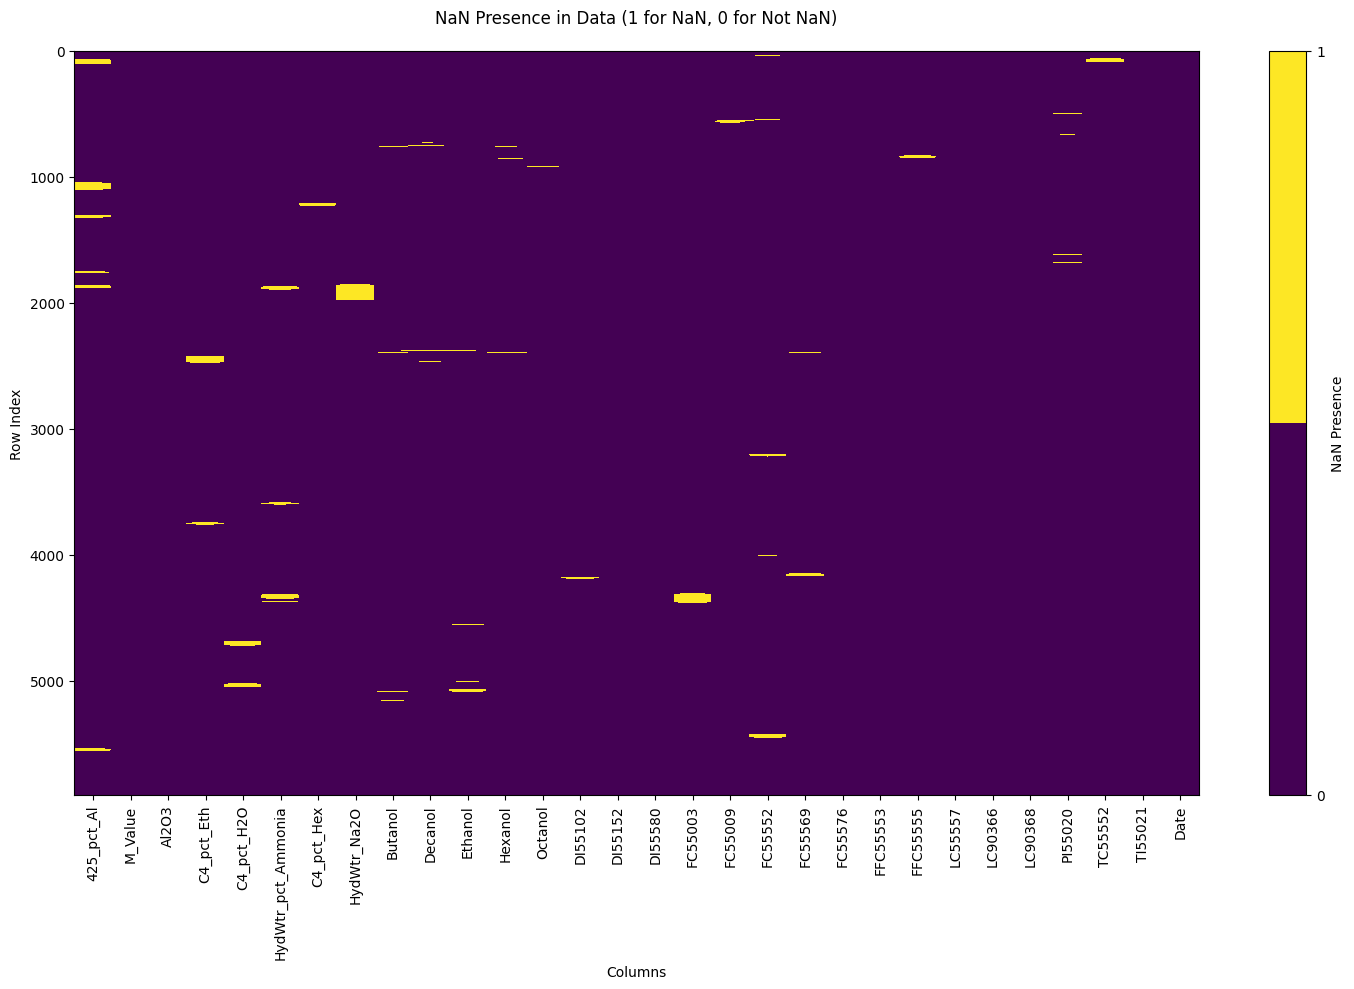

In [13]:


# Create a binary matrix to represent NaNs (1 for NaN, 0 for a number)
nan_matrix = np.where(df_outlierHandling.isna(), 1, 0)

fig, ax = plt.subplots(figsize=(15, 10))  # Adjust the size as needed
cmap = plt.get_cmap('viridis', 2)  # We use a colormap that differentiates between 0 and 1 clearly

# Plotting heatmap
cax = ax.imshow(nan_matrix, cmap=cmap, aspect='auto')

# Adding colorbar for reference
plt.colorbar(cax, ticks=[0, 1], label='NaN Presence')
plt.title("NaN Presence in Data (1 for NaN, 0 for Not NaN)", pad=20)

# To make the columns readable and vertical
plt.xticks(range(df_outlierHandling.shape[1]), df_outlierHandling.columns, rotation=90)  # rotation set to 90 for vertical labels

plt.xlabel('Columns')
plt.ylabel('Row Index')

plt.tight_layout()
plt.show()


In [14]:
df_outlierHandling = df_outlierHandling.dropna().copy()



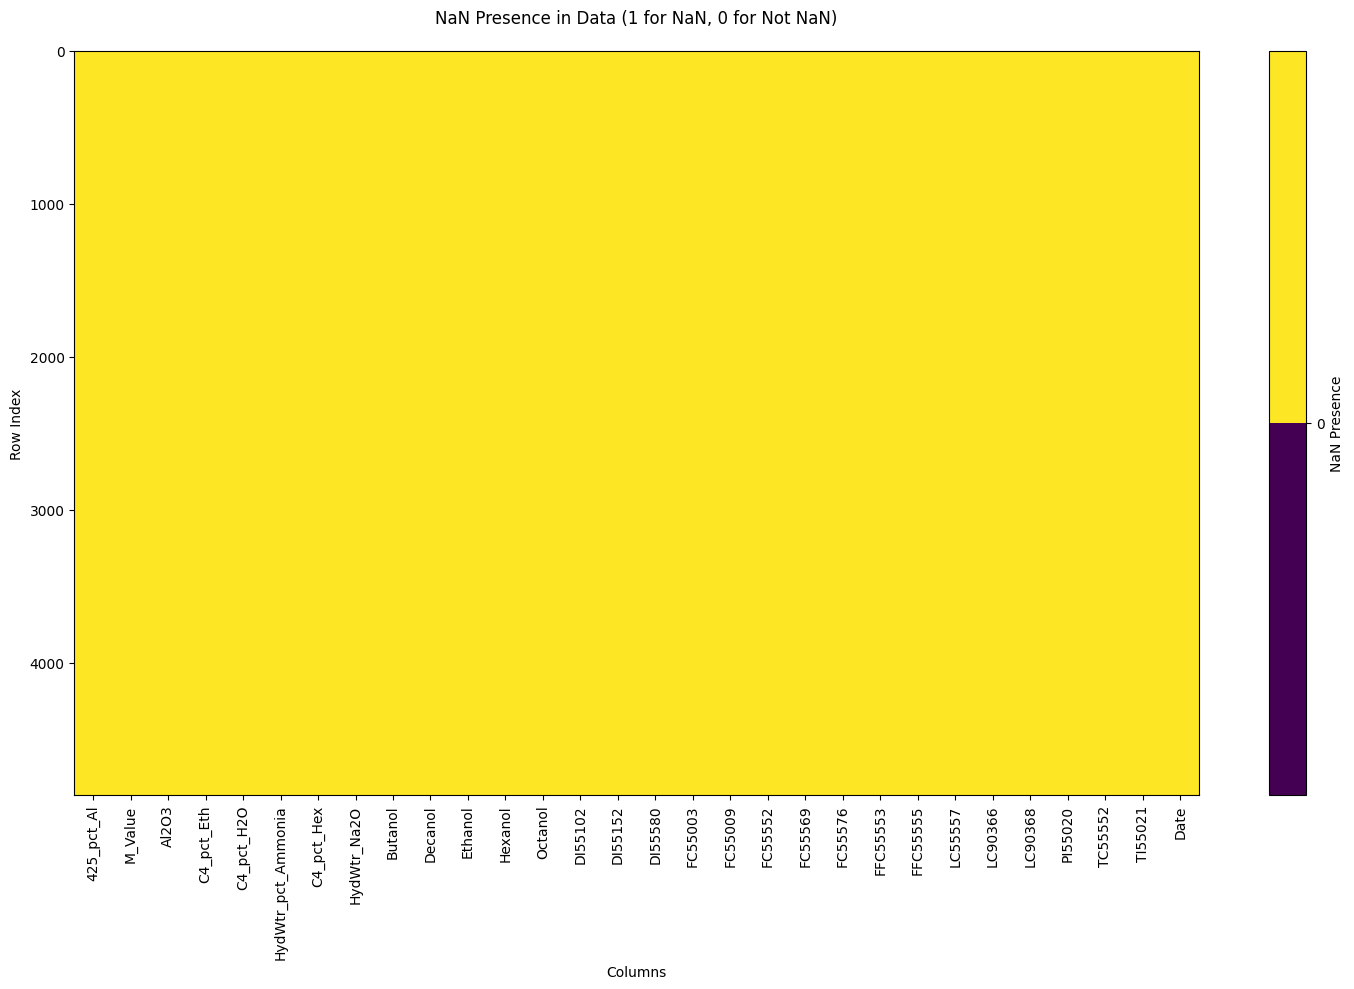

In [15]:


# Create a binary matrix to represent NaNs (1 for NaN, 0 for a number)
nan_matrix = np.where(df_outlierHandling.isna(), 1, 0)

fig, ax = plt.subplots(figsize=(15, 10))  # Adjust the size as needed
cmap = plt.get_cmap('viridis', 2)  # We use a colormap that differentiates between 0 and 1 clearly

# Plotting heatmap
cax = ax.imshow(nan_matrix, cmap=cmap, aspect='auto')

# Adding colorbar for reference
plt.colorbar(cax, ticks=[0, 1], label='NaN Presence')
plt.title("NaN Presence in Data (1 for NaN, 0 for Not NaN)", pad=20)

# To make the columns readable and vertical
plt.xticks(range(df_outlierHandling.shape[1]), df_outlierHandling.columns, rotation=90)  # rotation set to 90 for vertical labels

plt.xlabel('Columns')
plt.ylabel('Row Index')

plt.tight_layout()
plt.show()


In [16]:
# Calculate the statistics for each column in df_outlierHandling
total_rows = len(df_outlierHandling)
non_nan_count = df_outlierHandling.count()
nan_count = df_outlierHandling.isnull().sum()
nan_percentage = (nan_count / total_rows) * 100

# Store these in a DataFrame
nan_stats = pd.DataFrame({
    'ID': df_outlierHandling.columns,
    'total_rows': total_rows,
    'non_nan_count': non_nan_count.values,
    'nan_count': nan_count.values,
    'nan_percentage': nan_percentage.values
})

print(nan_stats)

## Plot
#nan_stats.set_index('ID')['nan_percentage'].plot(kind='bar')
#plt.ylabel('Percentage of NaNs')
#plt.title('Percentage of NaNs in each column')
#plt.show()\

                    ID  total_rows  non_nan_count  nan_count  nan_percentage
0           425_pct_Al        4863           4863          0             0.0
1              M_Value        4863           4863          0             0.0
2                Al2O3        4863           4863          0             0.0
3           C4_pct_Eth        4863           4863          0             0.0
4           C4_pct_H2O        4863           4863          0             0.0
5   HydWtr_pct_Ammonia        4863           4863          0             0.0
6           C4_pct_Hex        4863           4863          0             0.0
7          HydWtr_Na2O        4863           4863          0             0.0
8              Butanol        4863           4863          0             0.0
9              Decanol        4863           4863          0             0.0
10             Ethanol        4863           4863          0             0.0
11             Hexanol        4863           4863          0             0.0

In [17]:
# 40127  - All Tags included - 3/9/24

num_columns = df_outlierHandling.shape[1]
print("Number of features:", num_columns)

Number of features: 30


## Add Columns to Describe Butanol and Decanol Content

Binary data must be added after Outlier handleing :) 

In [18]:
# Add new column 'B', with 1 if 'A' > 25, else 0
# df_outlierHandling['C4_Spec'] = np.where(df_outlierHandling['Butanol'] < 62, 1, 0)
# df_outlierHandling['C10_Spec'] = np.where(df_outlierHandling['Decanol'] < 5, 1, 0)

In [19]:
df_outlierHandling.describe()

425_pct_Al      M_Value        Al2O3   C4_pct_Eth   C4_pct_H2O  \
count  4863.000000  4863.000000  4863.000000  4863.000000  4863.000000   
mean      6.222920     3.633756    11.538166     1.802088    18.017181   
min       5.014820     3.339330    10.762400     0.554000    13.980000   
25%       6.124655     3.567620    11.198350     1.466635    17.014350   
50%       6.266540     3.626290    11.561900     1.769500    17.794600   
75%       6.378175     3.706825    11.939900     2.014315    18.740600   
max       6.865290     3.901390    12.201500     3.047460    22.732800   
std       0.267239     0.098093     0.423523     0.393309     1.446226   

       HydWtr_pct_Ammonia   C4_pct_Hex  HydWtr_Na2O      Butanol      Decanol  \
count         4863.000000  4863.000000  4863.000000  4863.000000  4863.000000   
mean             0.948237     0.378258     1.689323    13.817716     2.727750   
min              0.649250     0.041967     0.000000     0.900000     0.000000   
25%              0.871500     0.300553     1.060425     2.186670     1.563330   
50%              0.931875     0.375000     1.676910     3.980000     2.158330   
75%              1.021615     0.454165     1.884270    20.658350     3.750000   
max              1.374520     0.673000    24.397300    74.770000     7.768330   
std              0.115516     0.112933     1.733939    17.474692     1.502229   

           Ethanol      Hexanol      Octanol      DI55102      DI55152  \
count  4863.000000  4863.000000  4863.000000  4863.000000  4863.000000   
mean     19.764155     1.513835     2.152780     0.825533     1.022945   
min       0.610000     0.000000     0.540000     0.750013     0.965978   
25%       3.881670     0.955000     1.290000     0.794854     1.001015   
50%      10.096700     1.210000     1.660000     0.794860     1.026990   
75%      28.243300     2.060000     3.055000     0.862055     1.046290   
max      87.580000     3.909320     5.729400     0.999487     1.071690   
std      21.074383     0.747292     1.138754     0.055241     0.025410   

           DI55580      FC55003      FC55009       FC55552      FC55569  \
count  4863.000000  4863.000000  4863.000000   4863.000000  4863.000000   
mean      0.970547  5915.277415  1110.353856  34708.236973  6521.006597   
min       0.873708  3495.310000    59.931500  23523.500000  5477.780000   
25%       0.941198  5447.270000   865.216500  32989.700000  6308.805000   
50%       0.983524  5890.350000  1084.950000  36027.100000  6442.550000   
75%       0.998387  6403.680000  1326.785000  37448.800000  6727.735000   
max       1.030410  8369.130000  2244.140000  43342.900000  7567.070000   
std       0.036531   704.302443   366.916357   3406.599218   336.992674   

           FC55576     FFC55553     FFC55555      LC55557      LC90366  \
count  4863.000000  4863.000000  4863.000000  4863.000000  4863.000000   
mean    374.621914     0.918578     0.786579    71.191804    58.480030   
min       0.138046     0.796049     0.744077    52.161300    28.690700   
25%     232.452000     0.889723     0.779083    63.094850    50.152950   
50%     387.397000     0.920461     0.781080    74.959200    60.856700   
75%     498.710500     0.950629     0.799594    76.908200    66.593600   
max     890.725000     1.049780     0.830030    82.875700    78.844100   
std     189.402749     0.045267     0.013370     6.619247    10.558086   

           LC90368      PI55020      TC55552      TI55021  \
count  4863.000000  4863.000000  4863.000000  4863.000000   
mean     57.366992    -0.457334   165.665512   225.747036   
min      28.170900    -2.468400   137.535000   215.852000   
25%      49.068200    -0.810843   160.038500   222.839500   
50%      60.383700    -0.325274   164.894000   226.165000   
75%      65.878000    -0.001736   175.117500   228.229500   
max      77.101700     1.386530   199.243000   235.343000   
std      11.208154     0.622692    11.251458     3.420773   

                                Date  
count       

In [20]:
df_outlierHandling.to_csv('contData_outliers_removed.csv', index=False)

df_outlierHandling.columns

Index(['425_pct_Al', 'M_Value', 'Al2O3', 'C4_pct_Eth', 'C4_pct_H2O',
       'HydWtr_pct_Ammonia', 'C4_pct_Hex', 'HydWtr_Na2O', 'Butanol', 'Decanol',
       'Ethanol', 'Hexanol', 'Octanol', 'DI55102', 'DI55152', 'DI55580',
       'FC55003', 'FC55009', 'FC55552', 'FC55569', 'FC55576', 'FFC55553',
       'FFC55555', 'LC55557', 'LC90366', 'LC90368', 'PI55020', 'TC55552',
       'TI55021', 'Date'],
      dtype='object')

In [21]:
saoSelect = ['Date', '425_pct_Al', 'Al2O3', 'M_Value', 
             'C4_pct_Eth', 'C4_pct_H2O', 'HydWtr_pct_Ammonia', 
            'C4_pct_Hex','HydWtr_Na2O']

fb554Select = ['Date', 
               'Butanol', 
               'Decanol',
               'Ethanol',
               'Hexanol',
               'Octanol'
               ]

unitSelect = ['Date', 
              'DI55102', 
              'DI55152', 
              'DI55580', 
              'FC55003', 
              'FC55009', 
              'FC55552', 
              'FC55569', 
              'FC55576', 
              'FFC55553', 
              'FFC55555', 
              'LC55557', 
              'LC90366', 
              'LC90368', 
              'PI55020', 
              'TC55552', 
              'TI55021'
              ]

df_clean_425 = df_outlierHandling[saoSelect].copy()

df_clean_554 = df_outlierHandling[fb554Select].copy()

df_clean_unit = df_outlierHandling[unitSelect].copy()

num_columns_425 = df_clean_425.shape[1]
num_columns_554 = df_clean_554.shape[1]
num_columns_unit = df_clean_unit.shape[1]
num_columns_total = num_columns_554 + num_columns_425 + num_columns_unit


print("Number of features:", num_columns_total)

print("Number of features - (['Date']*2):", num_columns_total-2)


Number of features: 32
Number of features - (['Date']*2): 30


In [22]:
# df_clean_425.to_csv(r'C:\Users\steve\OneDrive\1. BAIUTEK\Project-OptiC4\1 Preprocess\Continuous Data\cont_425Data_clean.csv', index=False)

# df_clean_554.to_csv(r'C:\Users\steve\OneDrive\1. BAIUTEK\Project-OptiC4\1 Preprocess\Continuous Data\cont_554Data_clean.csv', index=False)

# df_clean_unit.to_csv(r'C:\Users\steve\OneDrive\1. BAIUTEK\Project-OptiC4\1 Preprocess\Continuous Data\cont_unitData_clean.csv', index=False)


In [23]:
# bordeCode

df_clean_425.to_csv(r'C:\Users\austinsh\Project-OptiC4\IV Optimize\Testing Data\Continuous Data 2023\cont_425Data_clean.csv', index=False)

df_clean_554.to_csv(r'C:\Users\austinsh\Project-OptiC4\IV Optimize\Testing Data\Continuous Data 2023\cont_554Data_clean.csv', index=False)

df_clean_unit.to_csv(r'C:\Users\austinsh\Project-OptiC4\IV Optimize\Testing Data\Continuous Data 2023\cont_unitData_clean.csv', index=False)

In [24]:
from datetime import datetime

# Get the current date and time
current_date_time = datetime.now()

# Print the current date and time
print(current_date_time)


2024-05-07 02:42:38.798915
